# Summary of Notation
---


(full notation in Appendix A)

> Whenever you see the word "value", think "action's Expected Value of reward" (AEVOR). This is usually a $P(win)$ or (in the bandit case) probability-weighted-avg $R_t$, given that that action is taken. It can be either a "True" value (i.e. the population mean of the action's distribution) or an estimate (i.e. sample statistic) of it.

| Symbol | Meaning |
|--------|---------|
| $\Pr\{X = x\}$ | Probability that random variable $X$ takes value $x$ |
| $X \sim p$ | $X$ is drawn from distribution $p$ |
| $\mathbb{E}[X]$ | Expectation of random variable $X$ |
| $\arg\max_a f(a)$ | Value of $a$ that maximizes $f(a)$ |
| $\alpha$, $\beta$, $\epsilon$ | Step-size, decay-rate, and exploration parameters |
| $s, s'$ | States |
| $a$ | Action |
| $r$ | Reward |
| $S, A(s), R$ | Set of states, available actions, rewards |
| $t, T$ | Discrete time step, final step |
| $S_t, A_t, R_t$ | State, action, and reward at time $t$ |
| $\pi$ | Policy (decision-making rule) |
| $\pi(s)$ | action taken in state $s$ under _deterministic_ $\pi$ |
| $\pi(a \mid s)$ | Probability of taking action $a$ in state $s$ under _stochastic_ $\pi$ |
| $G_t$ | Return from time $t$ |
| $h$ | horizon (the timestep one looks up to in a forward view) |
| $v_\pi(s)$ | Value of state $s$ under policy $\pi$ |
| $q_\pi(s, a)$ | Value of state-action pair $(s,a)$ under $\pi$ |
| $p(s', r \mid s, a)$ | Transition dynamics |
| $\hat{v}(s, \mathbf{w})$ | Approximate value function using weight vector $\mathbf{w}$ |
| $\delta_t$ | Temporal-difference error at time $t$ |

# Chapter 1: Introduction
---

## 1.1 Reinforcement Learning

- **Definition**: Learning how to map situations to actions to maximize cumulative reward.
- **Core elements**:
  - **Trial-and-error search**: The agent explores to learn.
  - **Delayed reward**: Actions impact long-term outcomes, not just immediate feedback.
- **Distinguishing features**:
  - Not told *what* actions to take, only gets feedback via rewards.
  - Must balance **exploration vs. exploitation**.
- **Compared to other paradigms**:
  - **Supervised learning**: Learns from labeled examples.
  - **Unsupervised learning**: Learns hidden structure from unlabeled data.
  - **RL**: Maximizes rewards via interaction; often needs to explore unknown state spaces.

---
## 1.2 Examples

Real-world analogies include:
- **Chess**: Intuition + planning, learning from position values.
- **Adaptive control**: Tuning refinery settings in real time.
- **Animals**: Gazelle calf learning to run soon after birth.
- **Robots**: Battery-aware navigation decisions.
- **Daily tasks**: Preparing breakfast involves conditional behavior, goals, and sensory feedback.

**Key Takeaway**: RL applies broadly wherever an agent interacts with an environment, learns over time, and must adapt to uncertainty.

---
## 1.3 Elements of Reinforcement Learning

Four main components:

1. **Policy ($\pi$)**:
   - Mapping from states to actions: $\pi(s)$ or $\pi(a|s)$.
   - Can be deterministic or stochastic.

2. **Reward Signal ($r$)**:
   - Defines the goal.
   - Immediate signal from the environment, tells what’s good or bad.

3. **Value Function ($v(s)$, $q(s,a)$)**:
   - Estimates long-term reward.
   - **$v_\pi(s)$**: Expected return from state $s$ under policy $\pi$.
   - Guides decision-making more than immediate rewards.

4. **Model (optional)**:
   - Simulates environment behavior: $p(s', r \mid s, a)$.
   - Enables **planning** (model-based) vs. **direct interaction** (model-free).

---

## 1.4 Limitations and Scope

- Assumes a **state signal** is given (e.g., as preprocessed input).
- Reinforcement learning does not inherently solve **state representation**.
- Evolutionary methods can solve RL problems without value functions, but often less efficient.
- Focus of this book: **model-free and model-based RL** with value estimation.

---

## 1.5 An Extended Example: Tic-Tac-Toe

Goal: Learn to beat an imperfect opponent without knowing its strategy a priori.

> About the best one can do on this problem is first to learn a model of the opponent’s behavior, up to some level of confidence, and then apply dynamic programming to compute an optimal solution given the approximate opponent model. In the end, this is not that different from some of the reinforcement learning methods we examine later in this book.

KEY: In this example, "value" is the estimated probability of winning in a given board state. The "value function" is the learned $P(win)$ estimates for ALL board states.

### **Approach _using a value function_**:
- Initialize a "value table" $V(s)$ that maps board states to win probabilities:
   - Each "cell" in the value table corresponds to a possible board state $s$. 
   - Each cell's value is the latest estimate of the probability of winning from that state (that state's _value_ $V(s_i)$).
   - The whole table is the learned _value function_.
   - Initialize the table with:
      - 1s for all states that have 3 Xs in a row.
      - 0s for all states that have 3 Os in a row.
      - 0.5 for all other states.
- Play a bunch of games against the opponent and update the values.
- Use mostly greedy moves (choose highest available $V(s)$), but occasionally explore (choose non-highest $V(s)$).
- Once the game is finished, **after greedy moves only**, update the value of the previous state ($V(S_t)$) to be closer to the current state ($V(S_{t+1})$):
  $$
  V(S_t) \leftarrow V(S_t) + \alpha \left[V(S_{t+1}) - V(S_t)\right]
  $$
   - where $\alpha$ is a step-size parameter (small positive fraction).
   - **START AT THE TERMINAL STATE AND MOVE BACKWARDS, BACKPROPAGATING THE UPDATES TO $S_0$ FOR GREEDY MOVES ONLY**.
   - Since value updates occur **only after greedy moves**, exploration is not used for learning.
- This is an example of a temporal-difference update rule.

<img src="../img/3.png" alt="tictactoe-backprop" width="50%"/>

#### **Note on mechanics**:
- It can (I think) be assumed that Sutton & Barto's tic-tac-toe example is "episodic TD(0)", where the update rule is applied after the game concludes.
   - This means that the post-game update applied to the penultimate move causes the update rule to backprop over multiple timesteps (in reverse order..."one-step bootsrapping"), sweeping from $S_{T-1}$ back to $S_0$ (but not applied for any exploration moves made along the way).
- "Online TD(0)": each update happens immediately after a step. 
   - In the first few games, the only signal comes from terminal states, as there is no gradient information to drive updates between intermediate timesteps.
      - In game 1, since all non-final board states are initiated with 0.5, $V(S_{t+1})$ does not impact the update to the previous state's value (because $V(S_{t+1}) - V(S_t)$ = 0) for all intermediate timesteps. However, the second-to-last board state does get updated with either $\alpha \left[1 - 0.5\right]$ or $\alpha \left[0 - 0.5\right]$ based on win or loss. In future games, the third from last board state _may_ (or may not) get updated because the penultimate is now updated.

#### **Why Exploration Helps Even Without Direct Updates**:

Exploration moves don’t directly cause value updates, but they indirectly shape which states you’ll encounter later in the game. By choosing exploratory actions, the learner encounters and evaluates board states that would never appear if playing purely greedily. This leads to two key impacts on learning:
1.	Indirect discovery of better strategies:
   - Exploration moves lead the agent into unfamiliar board states. While these states themselves aren’t updated immediately, the greedy moves taken afterwards (once back on the greedy path) do get updated based on these newly discovered outcomes.
   - Thus, exploratory moves can uncover states with higher true values than currently known, indirectly reshaping the value function.
2.	Indirect correction of overly optimistic values:
   - Conversely, exploration can also reveal states that initially appeared promising (due to limited experience), but actually lead to losses.
   - Even though the exploratory moves themselves aren’t updated directly, they still “set up” future greedy moves to be evaluated realistically, correcting inflated values indirectly.

### **Takeaways**:
- RL learns from interaction without a model of the opponent.
- It backs up values from future to past states.
- Unlike evolutionary methods, RL learns online, and credit assignment is finer-grained.

### **Model-Free Nature**:
- Doesn’t require modeling opponent or future states.
- Works via **temporal-difference (TD) learning**.
- Can generalize using function approximators (e.g., Tesauro’s neural network for Backgammon).

---

## 1.6 Summary

- RL is a third paradigm alongside supervised and unsupervised learning.
- Uses **Markov Decision Processes (MDPs)** to formalize interaction.
- Central tools:
  - **Value functions**
  - **Trial-and-error updates**
- RL = learning by *interacting*, *adapting*, and *optimizing long-term outcomes*.

---

## 1.7 Early History of Reinforcement Learning

**Two foundational threads**:
1. **Trial-and-error learning**:
   - Roots in psychology: Thorndike’s *Law of Effect*, Skinner’s reinforcement, Pavlov’s conditioning.
   - Turing (1948) described pleasure/pain driven learning machines.
   - Shannon’s *Theseus*, Michie’s *MENACE*, Samuel’s *checkers program* were early digital examples.

2. **Optimal control and dynamic programming**:
   - Bellman’s **DP** and **Bellman equations** in 1950s.
   - MDPs (Howard, 1960) formalized stochastic control problems.
   - Combined with function approximation: "neurodynamic programming".

**Modern RL** = Integration of:
- Dynamic programming theory (optimal control)
- Psychological theories of learning
- Computational models like TD-learning

---

## Chapter 1 Exercises

<img src="../img/4.png" alt="4" width="50%"/>
<br>
<img src="../img/5.png" alt="5" width="50%"/>

### Answers & Intuition

---

#### **Exercise 1.1: Self-Play**
**Q:** What happens if the RL algorithm plays against itself, both sides learning? Would it learn a different policy for selecting moves?

**A:**  
If both sides learn via self-play, the algorithm can converge to an optimal (or near-optimal) policy for both players, potentially leading to a policy that is robust to strong opponents, not just random ones. The learned policy may differ from what is learned against a random opponent, as the distribution of experiences will be more challenging and realistic.

**Intuition:**  
Self-play is foundational in RL for learning robust strategies, as seen in AlphaGo/AlphaZero. This question builds intuition for learning from interaction with non-stationary or improving opponents.

---

#### **Exercise 1.2: Symmetries**
**Q:** How might we amend the learning process to exploit board symmetries? How would this help? Should we still do this if the opponent does not exploit symmetries? Do symmetric positions necessarily have the same value?

**A:**  
We can exploit symmetries by treating symmetric board positions as equivalent, updating their values together, which reduces the state space and improves data efficiency. This accelerates learning because knowledge from one symmetric state transfers to others.  
If the opponent does *not* exploit symmetries, we may still benefit, but symmetric positions could end up having different practical values due to asymmetric play. Symmetric positions *should* have the same value only if the opponent's policy is itself symmetric.

**Intuition:**  
This introduces the idea of state abstraction and function approximation—core to generalization and sample efficiency in RL.

---

#### **Exercise 1.3: Greedy Play**
**Q:** What happens if the player always acts greedily (never explores)? Might it learn to play better or worse than a non-greedy player? What problems can occur?

**A:**  
A purely greedy player risks converging to suboptimal policies due to lack of exploration ("getting stuck" in local optima), and may never discover better moves. In practice, this can lead to worse performance compared to a player who explores and updates values more broadly. Problems include incomplete learning and overfitting to initial experiences.

**Intuition:**  
This exercise motivates the importance of exploration in RL (vs. exploitation), foundational for concepts like $\epsilon$-greedy, softmax, and exploration-exploitation tradeoff.

---

#### **Exercise 1.4: Learning from Exploration**
**Q:** What if learning updates occur after all moves (including exploratory)? What are the two sets of probabilities? Which method is better for learning/winning?

**A:**  
- **If we update after all moves (including exploratory):** The value estimates reflect the actual probabilities with which moves are taken, blending greedy and exploratory choices.
- **If we update only after greedy moves:** The values reflect the policy if only the best-known moves are always chosen.
- Continuing to make exploratory moves but learning only from greedy moves focuses learning on the policy we intend to follow for winning, which usually results in better performance than learning from all moves (which blends exploration into the policy).

**Intuition:**  
This foreshadows "on-policy" vs. "off-policy" learning distinctions and highlights how the target of updates matters in RL algorithms.

---

#### **Exercise 1.5: Other Improvements**
**Q:** What other ways can we improve the RL player? Any better way to solve the tic-tac-toe problem?

**A:**  
Possible improvements:
- Use deeper lookahead (planning) or tree search.
- Incorporate opponent modeling.
- Use value function approximation (e.g., neural nets).
- Exploit more domain knowledge (e.g., forced moves).
- Enhance exploration strategy (e.g., UCB, optimism).
For tic-tac-toe, full minimax search can solve the game exactly, but the RL approach generalizes to much harder problems.

**Intuition:**  
This encourages thinking about RL's flexibility and limitations, foreshadowing the use of model-based planning, opponent modeling, and advanced function approximation.

---

---
---

# Part I: Tabular Solution Methods
---

<img src="../img/6.png" alt="tabularsolutionmethods" width="40%"/>

# Chapter 2: Multi-armed Bandits
---

> The most important feature distinguishing reinforcement learning from other types of learning is that it **uses training information that evaluates the actions taken rather than instructs by giving correct actions**. This is what creates the need for active exploration, for an explicit search for good behavior. Purely evaluative feedback indicates how good the action taken was, but not whether it was the best or the worst action possible. Purely instructive feedback, on the other hand, indicates the correct action to take, independently of the action actually taken....Evaluative feedback depends entirely on the action taken, whereas instructive feedback is independent of the action taken

**Bandit problems** model decision-making under uncertainty with *no state transitions*.  
Bandit problems in general are a special case of RL where there is only a single state.

Bandit problems model a **nonassociative setting**, in which the agent must learn (from evaluative feedback) in just one situation.

## 2.1 A $k$-Armed Bandit Problem
---

Unlike supervised learning, RL uses *evaluative* feedback—it tells you how good your chosen action was, but not what the best action would have been.

- **Setting**: At each time $t$, choose one of $k$ actions (“arms”), then observe reward $R_t$ drawn from a stationary distribution for that arm. So:
	- $k$: The number of actions (arms) to choose from.
	- $A_t$: The action (arm) selected at timestep $t$.
		- This is a RV. The observation of $A_t$ (i.e. the actual arm chosen at $t$) is denoted $a$.
	- $R_t$: Reward received from $A_t$.
- **Objective**: Maximize expected cumulative reward over time (e.g., $T=1000$ rounds).
	- In the "k-armed slot machine" example, the objective is to maximize your winnings by concentrating your actions on the best levers.
- **Approach**: For each arm $a$ of the $k$ arms, maintain a "$\text{value}$ estimate" $Q_t (a)$ equal to your estimate of the expected reward from choosing that arm.
	- $Q_t (a) = \text{value}_{A_t = a} = \hat{\mathbb{E}}[R_t \mid A_t = a]$
- **True action value** (_Equation 2.0_): For an arbitrary action, the <u>ACTUAL</u> expected reward given that $a$ is selected. We don't know this (population parameter).
  $$
  q_*(a) = \mathbb{E}[R_t \mid A_t = a]
  $$
	- If we knew the true action values, we'd just choose the highest $q_*(a)$ every time.
	- We don't. So we want to make $Q_t (a)$ as close to $q_*(a)$ as possible.
- **Exploration vs. exploitation**:
  - *Exploitation*: Choose the action you *currently* think is best.
	- Good for this step.
  - *Exploration*: Try other actions to discover if they might be better.
	- Good for the long run.
  - Balancing these is a *central challenge*—no single action achieves both at once.
	- E.g. say you have certainty on a greedy action's $value$ but there are several other actions with close-but-uncertain $value$s. Say the uncertainty is such that at least one of these other actions is probably actually better than the greedy action, but you don't know which one. 
		- In this scenario, given the nature of the uncertainty - 
			- If you have many timesteps left, you should probably explore.
			- If you don't, you should probably exploit.
	- In general, balancing explore vs. exploit = f($\quad Q_t (a)\quad \forall \quad a \in K$, uncertainties associated with each $Q_t (a)$, and remaining timesteps)
	- <u>HOWEVER, most sophisticated methods for balancing explore vs. exploit make strong, unrealistic assumptions around distribution stationarity and prior knowledge, SO this book focuses only on balancing them <i>at all</i>. We now look at simple methods for balancing explore vs. exploit with the point of showing that they are all better than "always exploit".</u>


---

## 2.2 Action-Value Methods

**Action-Value Methods**: Methods for estimating the values of actions and using those action value estimates to make action selection decisions.

### Value Estimation

- **Goal**: Estimate the "true value" $q_*(a)$ for each arm $a$.
- **Sample-average estimator** (_Equation 2.1_): Estimate "true value" of each arm as the average reward actually received from selecting that arm so far.
  $$
  Q_t(a) \doteq \frac{\text { sum of rewards when } a \text { taken prior to } t}{\text { number of times } a \text { taken prior to } t}=\frac{\displaystyle\sum_{i=1}^{t-1} R_i \cdot \mathbf{1}_{A_i=a}}{\displaystyle\sum_{i=1}^{t-1} \mathbf{1}_{A_i=a}}
  $$

  - where $\mathbf{1}_\text{predicate}$ is the indicator function (= 1 if predicate is True, else 0)
  - If denominator is 0, define $Q_t(a)$ to be some default value (e.g. 0)
  - As denominator $\to \infty$, $Q_t(a) \to q_*(a)$.
	- Note that this is simply a value estimation. So this only holds assuming your action selection strategy actually selects $a$ with some non-zero probability. 
	- i.o.w. this formula never even "runs" for arms that just get ignored (e.g. by purely greedy strategies).

Note that the sample-average method for estimating values is simple & just one of many value estimation methods. But we stick with it for the next sections.

### Action Selection Strategies

- **Greedy Action Selection method** (_Equation 2.2_): Always pick the arm with the highest value estimate.
  $$
  A_t \doteq \arg\max_a Q_t(a)
  $$
  - where $\arg\max_a$ denotes "select action $a$ for which the expression that follows is maximized (with ties broken arbitrarily, perhaps randomly)"
  - *Limitation*: Purely greedy strategies may permanently overlook arms with higher true values. 
  	- i.o.w. No guarantee that all $Q_t(a)$ actually converge to their respective $q_*(a)$. May get stuck exploiting a suboptimal action (resulting in a non-maximal cumulative reward) if your initial samples (and thus value estimates) of the highest true value arms happened to produce lower rewards.
- **$\epsilon$-greedy**: Be greedy most of the time, but select an action randomly $\epsilon$% of the time (where $\epsilon$ is some small probability)
  - With probability $1 - \epsilon$, pick greedy action.
  - With probability $\epsilon$, pick a random action.
  - *Guarantees*: As $t \to \infty$, all actions will be sampled infinitely often, ensuring $Q_t(a) \to q_*(a)$ by Law of Large Numbers.
  	- > This of course implies that the probability of selecting the optimal action converges to greater than $1 - \epsilon$, that is, to near certainty. 

**Key Point**: Simple random exploration (via $\epsilon$-greedy) is enough to outperform pure exploitation in most nontrivial problems.

### Exercise 2.1 Solution
**Q**: In $\epsilon$-greedy action selection with 2 actions and $\epsilon = 0.5$, what's the probability the greedy action is selected?

**A**: 
- With probability $1 - \epsilon = 0.5$, select greedy action deterministically.
- With probability $\epsilon = 0.5$, select randomly between 2 actions (each with probability 0.25).
- **Total probability of greedy action** = $0.5 + 0.5 \times 0.5 = 0.75$

---

## 2.3 The 10-Armed Testbed (how to test different action selection strategies)

**Purpose**: Create a standardized empirical benchmark for comparing bandit algorithms and understanding the exploration-exploitation tradeoff.

### Experimental Setup

- **Standard empirical benchmark** for comparing bandit algorithms.
- **Test suite**: 2000 randomly generated 10-armed bandit problems.
- **For each individual bandit problem**:
  - $k = 10$ arms (actions available).
  - **True action values** $q_*(a)$ for each arm $a = 1, 2, ..., 10$ sampled from $\mathcal{N}(0, 1)$.
    - This means the "best" arm varies randomly across problems.
    - Action values are distributed around 0 with unit variance.
  - **Reward generation**: When action $A_t$ is selected at time $t$, reward $R_t \sim \mathcal{N}(q_*(A_t), 1)$.
    - Rewards are noisy: normally distributed around the true action value with unit variance.
    - This noise makes it challenging to identify the best action quickly.

<img src="../img/fig2_1.png" alt="true value & reward distribution" width="50%"/>

### Methodology

- **One run**: Apply a learning algorithm to one bandit problem for 1000 time steps.
- **Performance measurement**: Track reward and optimal action selection over time.
- **Statistical reliability**: Average results over 2000 independent runs (each with different bandit problems).
- **Algorithms compared**: 
  - Pure greedy ($\epsilon = 0$)
  - $\epsilon$-greedy with $\epsilon = 0.01$ 
  - $\epsilon$-greedy with $\epsilon = 0.1$
- **Value estimation**: All methods use sample-average technique with initial estimates $Q_1(a) = 0$.

### Results (Figure 2.2)

<img src="../img/fig2_2.png" alt="testbed results" width="50%"/>

**Upper graph (Average Reward over Time)**:
- **Greedy method**: 
  - Improves slightly faster initially (exploits early good estimates).
  - Plateaus at lower performance (~1.0 average reward vs. ~1.54 optimal).
  - Gets "stuck" performing suboptimal actions.
- **$\epsilon$-greedy methods**:
  - Initially perform worse due to random exploration.
  - Eventually surpass greedy method due to continued learning.
  - $\epsilon = 0.1$: Faster initial improvement, higher exploration.
  - $\epsilon = 0.01$: Slower but more precise convergence.

**Lower graph (% Optimal Action Selection)**:
- **Greedy**: Finds optimal action only ~33% of the time.
  - In 2/3 of problems, early disappointing samples from optimal action cause permanent abandonment.
- **$\epsilon = 0.1$**: Explores more, finds optimal action earlier, but caps at ~91% (due to 10% random selection).
- **$\epsilon = 0.01$**: Slower improvement but eventually achieves higher optimal action percentage.

### Key Insights and Implications

**Why Greedy Fails**:
- **Early sampling bias**: If the truly optimal action gives disappointing early rewards (due to noise), greedy method abandons it permanently.
- **No recovery mechanism**: Once a suboptimal action appears best, greedy never reconsiders abandoned actions.
- **Premature convergence**: Settles on locally optimal choice based on limited early experience.

**Why $\epsilon$-greedy Succeeds**:
- **Guaranteed exploration**: Every action will be sampled infinitely often as $t \to \infty$.
- **Convergence guarantee**: By Law of Large Numbers, $Q_t(a) \to q_*(a)$ for all actions.
- **Probability of optimal convergence**: $\lim_{t \to \infty} P(\text{select optimal action}) \geq 1 - \epsilon$.

**Parameter Tradeoffs**:
- **Larger $\epsilon$ (0.1)**: 
  - Faster exploration and discovery of optimal action.
  - Lower asymptotic performance due to continued random actions.
- **Smaller $\epsilon$ (0.01)**:
  - Slower initial learning.
  - Better long-term performance with less "wasted" exploration.

### When Different Methods Excel

**Favor more exploration when**:
- **Higher reward variance**: Noisier rewards require more samples to identify true values.
- **Nonstationary environments**: True action values change over time, requiring ongoing exploration.
- **Uncertain initial conditions**: When starting knowledge is poor.

**Favor less exploration when**:
- **Deterministic rewards**: True values can be learned quickly (in extreme case, greedy optimal after one sample per action).
- **High confidence in estimates**: When you have good prior knowledge.
- **Short time horizons**: When there's insufficient time to benefit from exploration.

### Key Takeaway
The 10-armed testbed demonstrates that **even simple exploration can dramatically outperform pure exploitation** in realistic noisy environments. The optimal balance between exploration and exploitation depends on problem characteristics, but some exploration is almost always beneficial.

---
---
### Exercise 2.2 Solution
**Q:** Consider a 4-armed bandit with ε-greedy action selection, sample-average estimates, and initial estimates Q₁(a) = 0 for all a. Given the sequence: A₁ = 1, R₁ = -1; A₂ = 2, R₂ = 1; A₃ = 2, R₃ = -2; A₄ = 2, R₄ = 2; A₅ = 3, R₅ = 0. On which time steps did exploration definitely occur? On which could it have occurred?

**A:** Let's trace through the Q-value updates:

**Initial:** Q₁(1) = Q₁(2) = Q₁(3) = Q₁(4) = 0

**Step 1:** A₁ = 1, R₁ = -1
- All actions tied at Q = 0, so action 1 **could be greedy or exploratory**
- Update: Q₂(1) = -1, others remain 0

**Step 2:** A₂ = 2, R₂ = 1  
- Q-values: Q(1) = -1, Q(2) = Q(3) = Q(4) = 0
- Action 2 tied for greedy (highest at 0), so **could be greedy or exploratory**
- Update: Q₃(2) = 1, others unchanged

**Step 3:** A₃ = 2, R₃ = -2
- Q-values: Q(1) = -1, Q(2) = 1, Q(3) = Q(4) = 0
- Action 2 is greedy (highest at 1), so **could be greedy or exploratory**
- Update: Q₄(2) = (1 + (-2))/2 = -0.5

**Step 4:** A₄ = 2, R₄ = 2
- Q-values: Q(1) = -1, Q(2) = -0.5, Q(3) = Q(4) = 0
- Actions 3 and 4 tied for greedy (0), action 2 is not greedy (-0.5)
- **Definitely exploratory**
- Update: Q₅(2) = (1 + (-2) + 2)/3 = 1/3

**Step 5:** A₅ = 3, R₅ = 0
- Q-values: Q(1) = -1, Q(2) = 1/3, Q(3) = Q(4) = 0
- Action 2 is greedy (1/3), action 3 is not greedy (0)
- **Definitely exploratory**

**Answer:** 
- **Definitely exploratory:** Steps 4 and 5
- **Could have been exploratory:** Steps 1, 2, and 3

---

### Exercise 2.3 Solution
**Q:** In Figure 2.2, which method will perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be?

**A:** The **ε = 0.01 method** will perform best in the long run on both measures.

**Probability of selecting optimal action:**
- **ε = 0.1:** Asymptotes at ~91% (due to 10% random exploration)
- **ε = 0.01:** Will asymptote at ~99% (due to only 1% random exploration)
- **Improvement:** ~8 percentage points higher optimal action selection

**Average reward:**
- **ε = 0.1:** Limited by continued exploration reducing average reward
- **ε = 0.01:** Higher asymptotic reward due to more exploitation of learned optimal action

**Quantitative reasoning:**
- As t → ∞, both methods learn the true action values perfectly
- ε = 0.01 selects optimal action with probability ≥ 1 - 0.01 = 0.99
- ε = 0.1 selects optimal action with probability ≤ 1 - 0.1 = 0.90
- Given optimal action has highest expected reward, ε = 0.01 achieves ~9% more optimal selections
- This translates directly to higher long-run average reward proportional to the reward difference between optimal and suboptimal actions

**Trade-off:** ε = 0.01 learns more slowly initially but achieves better asymptotic performance.

---
---

---

## 2.4 Incremental Implementation (how to actually implement action-value methods efficiently)

**Core Problem**: Naive implementation of sample averaging requires storing all past rewards and recomputing the full average each time—this scales poorly in both memory and computation.

**Relationship to episodic learning**: Unlike the tic-tac-toe example (which used batch updates after episodes), bandit problems typically update **after each action selection**. However, the incremental computation method shown here works for both cases—it's simply a more efficient way to compute sample averages whenever updates occur.

### The Memory and Computation Problem

**Naive sample-average implementation**:
- Store all rewards: $R_1, R_2, ..., R_{n-1}$ for each action
- Compute: $Q_n = \frac{R_1 + R_2 + \cdots + R_{n-1}}{n-1}$
- **Memory**: $O(n)$ - grows linearly with number of samples
- **Computation**: $O(n)$ per update - must sum all rewards each time

This becomes impractical for long-running systems or problems with many actions.

### The Incremental Solution

**Key insight**: We can update estimates incrementally using only the new reward and current estimate.

**Mathematical derivation** for the $n$-th reward $R_n$ for action $a$:

$$
\begin{align}
Q_{n+1} &= \frac{1}{n}\sum_{i=1}^{n} R_i \\
&= \frac{1}{n}\left[R_n + \sum_{i=1}^{n-1} R_i\right] \\
&= \frac{1}{n}\left[R_n + (n-1) \frac{1}{n-1}\sum_{i=1}^{n-1} R_i\right] \\
&= \frac{1}{n}\left[R_n + (n-1)Q_n\right] \\
&= \frac{1}{n}\left[R_n + nQ_n - Q_n\right] \\
&= Q_n + \frac{1}{n}\left[R_n - Q_n\right]
\end{align}
$$

**Incremental update rule** (_Equation 2.3_):
$$
Q_{n+1}(a) = Q_n(a) + \frac{1}{n}\left[R_n - Q_n(a)\right]
$$

**Efficiency gains**:
- **Memory**: $O(1)$ - only store $Q_n(a)$ and count $n$ for each action
- **Computation**: $O(1)$ per update - single arithmetic operation

### The General Update Form

**Universal pattern** (_Equation 2.4_):
$$
\text{NewEstimate} \leftarrow \text{OldEstimate} + \text{StepSize} \cdot \left[\text{Target} - \text{OldEstimate}\right]
$$

**Components**:
- **Target**: $R_n$ (the new reward observed)
- **StepSize**: $\frac{1}{n}$ (decreases as more samples are collected)
- **Error**: $\left[\text{Target} - \text{OldEstimate}\right]$ (how far off our current estimate is)

**Interpretation**:
- We "step toward" the target by an amount proportional to the error
- Step size determines how much we trust the new information vs. old estimate
- This pattern appears throughout RL, not just in bandits

### Bandit vs. Episodic Update Timing

**Bandit context (this chapter)**:
- Updates happen **immediately after each action** (online/continuing learning)
- No natural episode boundaries—learning continues indefinitely
- Incremental updates enable real-time learning without memory growth

**Episodic context (like tic-tac-toe)**:
- Updates might happen **after episodes complete** (batch updates)
- Same incremental formula applies, just applied at different times
- Whether online or batch, the computational efficiency benefits remain

**Key point**: Section 2.4 focuses on **computational efficiency of the update calculation itself**, regardless of when those updates occur in the learning process.

### Implementation Details

**Step-size parameter**: In the incremental method, step-size $\alpha_t(a) = \frac{1}{n}$ where $n$ is the number of times action $a$ has been selected.

**Pseudocode** (from the book):

<img src="../img/banditalgo.png" alt="bandit algo" width="40%"/>

See [Bandit Implementation in python, here](./code_examples/bandit_implementation.py).

---

## 2.5 Tracking a Nonstationary Problem

**Context shift**: Previous methods assume **stationary** bandit problems where reward probabilities don't change over time. In practice, many RL problems are **nonstationary**—the optimal action changes over time.

**Key insight**: For nonstationary problems, recent rewards should matter more than old rewards since old information may be outdated.

### The Problem with Sample Averages in Nonstationary Environments

**Sample-average method limitations**:
- Treats all rewards equally: $Q_n = \frac{1}{n}\sum_{i=1}^{n} R_i$
- Old rewards from 1000 steps ago get same weight as recent rewards
- **Cannot adapt** when true action values change over time
- **Slow response** to changes in optimal action

**Solution**: Use **constant step-size parameter** to emphasize recent experience.

### Constant Step-Size Method

**Modified incremental update rule** (_Equation 2.5_):
$$Q_{n+1} = Q_n + \alpha[R_n - Q_n]$$

where **step-size parameter** $\alpha \in (0, 1]$ is constant.

**Key differences from sample-average**:
- Step-size doesn't decrease with more samples ($\alpha$ vs. $\frac{1}{n}$)
- More recent rewards get higher effective weight
- Enables tracking of changing environments

### Exponential Recency-Weighted Average

**Mathematical expansion** (_Equation 2.6_):
$$
\begin{align}
Q_{n+1} &= Q_n + \alpha[R_n - Q_n] \\
&= \alpha R_n + (1-\alpha)Q_n \\
&= \alpha R_n + (1-\alpha)[\alpha R_{n-1} + (1-\alpha)Q_{n-1}] \\
&= \alpha R_n + (1-\alpha)\alpha R_{n-1} + (1-\alpha)^2 Q_{n-1} \\
&= \alpha R_n + (1-\alpha)\alpha R_{n-1} + (1-\alpha)^2\alpha R_{n-2} + \cdots \\
&\quad + (1-\alpha)^{n-1}\alpha R_1 + (1-\alpha)^n Q_1 \\
&= (1-\alpha)^n Q_1 + \sum_{i=1}^{n} \alpha(1-\alpha)^{n-i} R_i
\end{align}
$$

**Interpretation**:
- **Sum of weights**: $(1-\alpha)^n + \sum_{i=1}^{n} \alpha(1-\alpha)^{n-i} = 1$ ✓
- **Exponential decay**: Weight for reward $R_i$ is $\alpha(1-\alpha)^{n-i}$
- **Recency bias**: More recent rewards get exponentially higher weight
- **Decay rate**: $(1-\alpha)$ controls how quickly old information is forgotten

**Special cases**:
- $\alpha = 1$: Only most recent reward matters ($Q_{n+1} = R_n$)
- $\alpha \to 0$: Approaches sample average
- $1-\alpha = 0$: All weight on most recent reward

### Step-Size Sequence Convergence Conditions

**General step-size sequence** $\{\alpha_n(a)\}$ **convergence conditions** (_Equation 2.7_):
$$\sum_{n=1}^{\infty} \alpha_n(a) = \infty \quad \text{and} \quad \sum_{n=1}^{\infty} \alpha_n^2(a) < \infty$$

**Condition interpretations**:
1. **First condition**: Steps large enough to overcome initial conditions and random fluctuations
2. **Second condition**: Steps eventually become small enough to ensure convergence

**Method comparisons**:
- **Sample-average** ($\alpha_n = \frac{1}{n}$): ✓ Both conditions satisfied → **guaranteed convergence**
- **Constant step-size** ($\alpha_n = \alpha$): ✓ First condition, ✗ Second condition → **no convergence guarantee**

### Why Non-Convergence Can Be Good

**For nonstationary problems**:
- **Lack of convergence is desirable**—estimates should track changing values
- **Continued adaptation** to most recent rewards
- **Responsiveness** to environmental changes

**Trade-offs**:
- **Larger $\alpha$**: Faster adaptation, higher variance in estimates
- **Smaller $\alpha$**: Slower adaptation, lower variance, more stable

**Practical note**: Theoretical convergence guarantees often require impractically slow learning rates. Constant step-sizes with good empirical performance are preferred in practice.

### When to Use Each Method

**Sample-average ($\alpha = \frac{1}{n}$)**:
- **Stationary environments** where true values don't change
- When you want **guaranteed convergence** to true values
- **Long-term accuracy** more important than adaptation speed

**Constant step-size ($\alpha = $ constant)**:
- **Nonstationary environments** where values change over time
- When **responsiveness** to recent changes is crucial
- **Online learning** scenarios with ongoing environmental shifts

### Exercise 2.4 Solution
**Q:** If step-size parameters αₙ are not constant, what is the weighting on each prior reward for the general case?

**A:** For general step-size sequence {α₁, α₂, ..., αₙ}, the weight on reward Rᵢ in estimate Qₙ₊₁ is:

$$w_i = \alpha_i \prod_{j=i+1}^{n} (1 - \alpha_j)$$

**Derivation:**
- $Q_{n+1} = Q_n + \alpha_n[R_n - Q_n] = \alpha_n R_n + (1-\alpha_n)Q_n$
- $Q_n = \alpha_{n-1} R_{n-1} + (1-\alpha_{n-1})Q_{n-1}$
- Substituting recursively gives the weight formula above

**Verification:** For constant α, this reduces to $w_i = \alpha(1-\alpha)^{n-i}$, matching equation (2.6).

### See [nonstationary testbed implementation, here](./code_examples/nonstationary_testbed.py) for Exercise 2.5.

### Key Takeaways

1. **Environment type determines method choice**: Stationary → sample-average, Nonstationary → constant step-size
2. **Step-size controls adaptation speed**: Larger α = faster adaptation but higher variance
3. **Exponential weighting emerges naturally** from constant step-size updates
4. **Non-convergence can be beneficial** when tracking changing environments
5. **This pattern generalizes** beyond bandits to full RL problems

---

## 2.6 Optimistic Initial Values

**Core idea**: Set initial action-value estimates $Q_1(a)$ to optimistically high values to encourage exploration, even with greedy action selection.

### The Technique

**Standard approach**: Initialize $Q_1(a) = 0$ for all actions
**Optimistic approach**: Initialize $Q_1(a) = +5$ (when true values $q_*(a) \sim \mathcal{N}(0,1)$)

**Why it works**:
- All actions start with unrealistically high value estimates
- Whichever action is selected first will yield disappointing reward (less than +5)
- Agent becomes "disappointed" and tries other actions
- Continues until all actions tried multiple times
- **Automatic exploration** even with purely greedy selection

### Mechanism and Limitations

**How disappointment drives exploration**:
1. Agent selects action with highest $Q(a)$ (initially all tied at +5)
2. Receives actual reward (much less than +5 in expectation)
3. Updates $Q(a)$ downward via sample averaging
4. Other actions still have optimistic values, so agent tries them
5. Process continues until realistic estimates emerge

**When it works well**:
- **Stationary problems** where true values don't change
- **Short-term exploration boost** at beginning of learning
- Problems where initial exploration is most valuable

**Limitations**:
- **Not suitable for nonstationary problems**: Drive for exploration is temporary
- **Beginning-focused**: Only encourages exploration early in learning
- **Task-dependent**: Requires setting appropriate optimistic level
- **One-time effect**: Once estimates converge, no further exploration benefit

**Key insight**: Simple tricks can be surprisingly effective, but they're not universally applicable.

---

## 2.7 Upper-Confidence-Bound Action Selection

**Motivation**: $\epsilon$-greedy explores indiscriminately. Better approach: explore actions based on their **potential** to be optimal, considering both current estimates and uncertainty.

### The UCB Algorithm

**UCB action selection** (_Equation 2.10_):
$$A_t = \arg\max_a \left[Q_t(a) + c\sqrt{\frac{\ln t}{N_t(a)}}\right]$$

**Components**:
- $Q_t(a)$: Current value estimate (exploitation term)
- $c > 0$: Confidence level parameter  
- $\sqrt{\frac{\ln t}{N_t(a)}}$: Uncertainty/confidence bound (exploration term)
- $N_t(a)$: Number of times action $a$ selected by time $t$

**Interpretation**: Select action with highest **upper confidence bound** on its true value.

### Why the Natural Logarithm?

**Mathematical origin**: The $\ln t$ term comes from **concentration inequalities** (particularly Hoeffding bounds) that provide probabilistic guarantees on estimation error.

**Key properties of $\ln t$**:
- **Grows unbounded**: Ensures all actions eventually selected
- **Grows slowly**: Doesn't dominate value estimates too quickly  
- **Time-dependent**: Accounts for overall experience level
- **Theoretical optimality**: Provides optimal regret bounds in certain settings

**Intuitive behavior**:
- As $t$ increases, pressure to explore all actions grows (but slowly)
- As $N_t(a)$ increases, confidence in estimate grows (exploration bonus decreases)
- Actions with fewer samples get higher exploration bonuses

### UCB Mechanism

**How uncertainty drives exploration**:
1. **Rarely-selected actions**: Large $\sqrt{\frac{\ln t}{N_t(a)}}$ term → high selection probability
2. **Frequently-selected actions**: Small uncertainty term → selection based mainly on $Q_t(a)$  
3. **Optimal actions**: Eventually dominate due to both high value and sufficient confidence

**Adaptive exploration**: UCB automatically balances exploitation and exploration without requiring manual parameter tuning for exploration rate.

### Performance and Limitations

**Advantages**:
- **Strong empirical performance** on stationary bandits
- **Principled approach** based on statistical confidence
- **Parameter-insensitive**: Less tuning required than $\epsilon$-greedy

**Limitations**:
- **Difficult to extend** beyond bandits to full RL settings
- **Nonstationary problems**: More complex methods needed
- **Large state spaces**: Not practical with function approximation
- **Computational complexity**: More complex than $\epsilon$-greedy

**Exercise 2.8 Solution**: The spike at step 11 occurs because after 10 steps, UCB has tried each action once. At step 11, $\ln t$ jumps significantly while $N_t(a)$ values are still small, creating large exploration bonuses that temporarily override value estimates. The spike decreases afterward as $N_t(a)$ values grow and exploration bonuses shrink.

---

## 2.8 Gradient Bandit Algorithms

**Paradigm shift**: Instead of estimating action **values**, learn action **preferences** and select actions probabilistically.

### Preference-Based Action Selection

**Action preferences**: $H_t(a) \in \mathbb{R}$ for each action $a$
- **Not interpretable as values**: Only relative preferences matter
- **Scale invariant**: Adding constant to all $H_t(a)$ doesn't change behavior
- **Learned through experience**: Start with $H_1(a) = 0$ (equal preferences)

**Action selection via softmax** (_Equation 2.11_):
$$\pi_t(a) = \Pr\{A_t = a\} = \frac{e^{H_t(a)}}{\sum_{b=1}^{k} e^{H_t(b)}}$$

### Softmax Function Deep Dive

**Mathematical formulation**: 
$$\text{softmax}(\mathbf{h})_i = \frac{e^{h_i}}{\sum_{j=1}^{k} e^{h_j}}$$

**Why exponential function?**:
- **Always positive**: $e^x > 0$ for all $x$, ensuring valid probabilities
- **Monotonic**: Higher preferences → higher probabilities
- **Differentiable**: Enables gradient-based learning
- **Amplifies differences**: Small preference differences become larger probability differences

**Temperature interpretation**: Implicit temperature $T = 1$. General form:
$$\pi_t(a) = \frac{e^{H_t(a)/T}}{\sum_{b=1}^{k} e^{H_t(b)/T}}$$
- **High T**: More uniform (exploratory)
- **Low T**: More concentrated on best action (exploitative)

**Usage in ML**:
- **Neural networks**: Final layer for classification
- **Multinomial logistic regression**: Link function
- **Reinforcement learning**: Policy parameterization
- **Attention mechanisms**: Weighting scheme

**Why appropriate for bandits**:
- **Smooth selection**: Avoids discrete exploration decisions
- **Differentiable**: Enables policy gradient methods
- **Probabilistic**: Natural for stochastic policies
- **Scale-free**: Relative preferences matter, not absolute values

### Gradient Bandit Update Rules

**Preference updates** (_Equation 2.12_):

**For selected action** $A_t$:
$$H_{t+1}(A_t) = H_t(A_t) + \alpha(R_t - \bar{R}_t)[1 - \pi_t(A_t)]$$

**For non-selected actions** $a \neq A_t$:
$$H_{t+1}(a) = H_t(a) - \alpha(R_t - \bar{R}_t)\pi_t(a)$$

**Parameters**:
- $\alpha > 0$: Step-size parameter
- $\bar{R}_t$: Average reward baseline (computed incrementally)

### Understanding the Updates

**Reward above baseline** ($R_t > \bar{R}_t$):
- **Selected action**: Preference increases by $\alpha(R_t - \bar{R}_t)[1 - \pi_t(A_t)]$
- **Non-selected actions**: Preferences decrease by $\alpha(R_t - \bar{R}_t)\pi_t(a)$
- **Effect**: Higher reward → increase probability of repeating selected action

**Reward below baseline** ($R_t < \bar{R}_t$):
- **Selected action**: Preference decreases
- **Non-selected actions**: Preferences increase  
- **Effect**: Poor reward → decrease probability of repeating selected action

**Why baseline matters**:
- **Variance reduction**: Reduces update noise, faster learning
- **Reference point**: Provides context for "good" vs "bad" rewards
- **Figure 2.5 evidence**: Without baseline, performance degrades significantly

### Theoretical Foundation: Stochastic Gradient Ascent

**Objective**: Maximize expected reward $\mathbb{E}[R_t] = \sum_a \pi_t(a)q_*(a)$

**True gradient**:
$$\frac{\partial \mathbb{E}[R_t]}{\partial H_t(a)} = \sum_x q_*(x) \frac{\partial \pi_t(x)}{\partial H_t(a)}$$

**Key mathematical result**:
$$\frac{\partial \pi_t(x)}{\partial H_t(a)} = \pi_t(x)[\mathbf{1}_{a=x} - \pi_t(a)]$$

where $\mathbf{1}_{a=x}$ is indicator function.

**Sample-based approximation**: The update rules (2.12) are unbiased estimates of the true gradient, making this algorithm an instance of **stochastic gradient ascent**.

**Convergence guarantee**: As a stochastic gradient method, has robust convergence properties to local optima.

**Exercise 2.9 Solution**: For two actions with preferences $H_t(1)$ and $H_t(2)$:
$$\pi_t(1) = \frac{e^{H_t(1)}}{e^{H_t(1)} + e^{H_t(2)}} = \frac{1}{1 + e^{H_t(2) - H_t(1)}}$$

This is the **logistic (sigmoid) function** with input $H_t(1) - H_t(2)$, commonly used in binary classification and neural networks.

---

## 2.9 Associative Search (Contextual Bandits)

**Bridge to full RL**: Introduces the concept of **state** while maintaining the single-step reward structure of bandits.

### The Associative Search Problem

**Setup**: Multiple bandit problems, with observable context indicating which problem you're facing.

**Example scenario**:
- Multiple slot machines with different colored displays
- Color indicates machine's current reward mapping
- Goal: Learn policy mapping colors (contexts) to optimal actions

**Formal definition**:
- **Context**: Observable state $s_t$ that indicates current bandit problem
- **Policy**: Mapping $\pi(s) : \mathcal{S} \to \mathcal{A}$ from contexts to actions
- **Objective**: Learn optimal action for each context

### Comparison to Other Problems

**vs. Standard k-armed bandit**:
- **Bandit**: Single stationary problem, learn one optimal action
- **Associative search**: Multiple problems, learn optimal action for each context

**vs. Full RL**:
- **Similar**: Both involve learning policies mapping states to actions
- **Different**: Actions only affect immediate reward, not next state
- **Associative search**: $s_{t+1}$ independent of $A_t$
- **Full RL**: $s_{t+1}$ depends on both $s_t$ and $A_t$

### Why Context Matters

**Without context information**:
- Appears as single nonstationary bandit
- Optimal strategy: Use methods from Section 2.5
- Performance limited by need to adapt to changing optimal action

**With context information**:
- Can learn separate policy for each context
- Much better performance possible
- Exploit structure in the environment

**Key insight**: **Information about state** dramatically improves learning performance when environment has structure.

### Solution Approaches

**Context-specific learning**:
- Maintain separate value estimates $Q_t(s,a)$ for each state-action pair
- Apply bandit algorithms within each context
- Use any method: $\epsilon$-greedy, UCB, gradient bandit, etc.

**Function approximation**:
- Learn general mapping from (context, action) to values
- Important when context space is large or continuous

**Exercise 2.10 Solution**:

**Without context knowledge**:
- Expected values: Action 1 gives $0.5 \times 10 + 0.5 \times 90 = 50$
- Action 2 gives $0.5 \times 20 + 0.5 \times 80 = 50$
- **Best strategy**: Either action, expected reward = 50

**With context knowledge**:
- **Case A**: Choose action 2 (20 > 10), expected reward = 20
- **Case B**: Choose action 1 (90 > 80), expected reward = 90  
- **Overall**: $0.5 \times 20 + 0.5 \times 90 = 55$
- **Improvement**: 10% better performance just from observing context

---

## 2.10 Summary

**Chapter overview**: Exploration vs. exploitation in the simplest RL setting—bandits provide foundation for understanding this fundamental tradeoff.

### Method Comparison and Performance

**Key algorithms covered**:

| Method | Core Idea | Best For | Limitations |
|--------|-----------|----------|-------------|
| **Greedy** | Always exploit current best estimate | Deterministic environments | Gets stuck in suboptimal choices |
| **$\epsilon$-greedy** | Random exploration with probability $\epsilon$ | General-purpose, robust | Indiscriminate exploration |
| **Optimistic initialization** | Start with overly high value estimates | Stationary problems | Temporary exploration only |
| **UCB** | Confidence-based exploration | Stationary bandits | Hard to extend to full RL |
| **Gradient bandit** | Learn action preferences, not values | When relative preferences matter | More complex than value-based |

**Performance insights from Figure 2.6**:
- **Inverted-U shape**: All methods have optimal parameter ranges
- **UCB**: Generally best performance on 10-armed testbed
- **Parameter sensitivity**: All methods fairly robust across parameter ranges
- **No universal winner**: Performance depends on problem characteristics

### Advanced Topics and Future Directions

**Bayesian approaches**:
- **Gittins indices**: Theoretically optimal for specific cases
- **Thompson sampling**: Sample from posterior distributions
- **Computational complexity**: Often intractable for large problems

**Theoretical guarantees**:
- **Regret bounds**: How quickly algorithms approach optimal performance
- **Sample complexity**: Number of steps needed to learn near-optimal policy
- **Exploration efficiency**: Formal measures of exploration quality

**Limitations of current methods**:
- **Distributional assumptions**: Most methods assume specific reward distributions
- **Prior knowledge**: Often require domain-specific parameter tuning
- **Scalability**: Simple methods may not extend to complex RL problems

### Comprehensive Symbol Reference

| Symbol | Meaning | Context |
|--------|---------|---------|
| **Problem Setup** | | |
| $k$ | Number of actions (arms) | Multi-armed bandit |
| $A_t$ | Action selected at time $t$ | Random variable |
| $R_t$ | Reward received at time $t$ | Random variable |
| $q_*(a)$ | True value of action $a$ | $\mathbb{E}[R_t \mid A_t = a]$ |
| **Value Estimation** | | |
| $Q_t(a)$ | Estimated value of action $a$ at time $t$ | Sample average or other estimate |
| $N_t(a)$ | Number of times action $a$ selected by time $t$ | Action count |
| $\alpha$ | Step-size parameter | Learning rate |
| $\bar{R}_t$ | Average reward baseline up to time $t$ | Variance reduction |
| **Action Selection** | | |
| $\epsilon$ | Exploration probability | $\epsilon$-greedy parameter |
| $\pi_t(a)$ | Probability of selecting action $a$ at time $t$ | Stochastic policy |
| $c$ | Confidence level parameter | UCB exploration control |
| **Gradient Bandits** | | |
| $H_t(a)$ | Preference for action $a$ at time $t$ | Not interpretable as value |
| **Mathematical Operators** | | |
| $\arg\max_a f(a)$ | Action $a$ that maximizes $f(a)$ | Greedy selection |
| $\mathbf{1}_{\text{condition}}$ | Indicator function | 1 if condition true, 0 otherwise |
| $\ln t$ | Natural logarithm of $t$ | UCB confidence bound |
| **Update Patterns** | | |
| Target $-$ OldEstimate | Error signal | Universal RL update pattern |
| StepSize $\times$ Error | Update magnitude | Learning rate control |

### Key Insights for Full RL

**Foundational concepts**:
1. **Exploration-exploitation tradeoff** appears in all RL problems
2. **Incremental updates** are computationally essential
3. **Step-size choice** affects adaptation vs. stability
4. **Baseline techniques** reduce variance in learning
5. **Context information** dramatically improves performance

**Limitations requiring more advanced methods**:
- **Sequential decision making**: Actions affect future states
- **Credit assignment**: Rewards may be delayed
- **Large state spaces**: Function approximation needed
- **Continuous actions**: Discrete methods don't apply

**Bridge to Chapter 3**: Associative search introduces states but maintains immediate rewards. Next: full RL where actions affect both immediate rewards and future states.

---
---

# Chapter 3: Finite Markov Decision Processes
---

**Chapter Overview**: This chapter introduces the formal mathematical framework that underlies most of reinforcement learning. We transition from simple bandits (Chapter 2) to the full RL problem where actions affect not just immediate rewards, but also future states and opportunities.

**Key Distinction from Bandits**: 
- **Bandits**: Actions only affect immediate rewards
- **MDPs**: Actions affect both immediate rewards AND future states (and thus future rewards)

![Agent-Environment Interface](../img/fig3_1.png)

---

## 3.1 The Agent–Environment Interface

**Core Framework**: The MDP framework models interaction between an **agent** (learner/decision-maker) and **environment** (everything outside the agent).

### The Interaction Loop

**Basic sequence** at discrete time steps $t = 0, 1, 2, 3, ...$:
1. Agent observes state $S_t$
2. Agent selects action $A_t$ 
3. Environment responds with reward $R_{t+1}$ and new state $S_{t+1}$

**Trajectory**: $S_0, A_0, R_1, S_1, A_1, R_2, S_2, A_2, R_3, ...$

### MDP Dynamics Function

**Four-argument dynamics function** (_Equation 3.2_):
$$p(s', r|s, a) \doteq \Pr\{S_t = s', R_t = r | S_{t-1} = s, A_{t-1} = a\}$$

**Components**:
- $s, s'$: Current and next states
- $a$: Action taken  
- $r$: Reward received
- $p(s', r|s, a)$: Probability of transitioning to state $s'$ and receiving reward $r$

**Mathematical intuition**: This function completely characterizes the environment's behavior. Given current state and action, it tells us the probability of every possible outcome.

**Probability constraint** (_Equation 3.3_):
$$\sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s', r|s, a) = 1, \text{ for all } s \in \mathcal{S}, a \in \mathcal{A}(s)$$

### Derived Functions

From the four-argument $p$ function, we can compute:

**State transition probabilities** (_Equation 3.4_):
$$p(s'|s, a) = \sum_{r \in \mathcal{R}} p(s', r|s, a)$$

**Expected rewards for state-action pairs** (_Equation 3.5_):
$$r(s, a) = \sum_{r \in \mathcal{R}} r \sum_{s' \in \mathcal{S}} p(s', r|s, a)$$

**Expected rewards for state-action-next-state triples** (_Equation 3.6_):
$$r(s, a, s') = \sum_{r \in \mathcal{R}} r \frac{p(s', r|s, a)}{p(s'|s, a)}$$

### The Markov Property

**Definition**: The state must include all information about the past that affects the future. 

**Mathematical statement**: $P(S_{t+1}, R_{t+1} | S_t, A_t, S_{t-1}, A_{t-1}, ...) = P(S_{t+1}, R_{t+1} | S_t, A_t)$

**Intuition**: If you know the current state, the past doesn't matter for predicting the future.

### Agent-Environment Boundary

**Key principle**: The boundary represents the limit of the agent's **absolute control**, not its knowledge.

**Examples**:
- **Robot arm**: Motors and sensors are part of environment, not agent
- **Chess program**: Board position is state, but opponent's strategy is part of environment
- **Human**: Muscles and sensory organs are environment

**Practical guideline**: Everything the agent cannot arbitrarily change belongs to the environment.

---

## 3.2 Goals and Rewards

### The Reward Hypothesis

> **Reward Hypothesis**: All goals and purposes can be thought of as maximizing the expected value of the cumulative sum of a received scalar signal (reward).

**Key insights**:
- Rewards define the goal, not how to achieve it
- Don't reward intermediate steps—reward the actual objective
- Example: Chess agent should be rewarded for winning, not for taking pieces

**Bad example**: Rewarding a chess agent for taking opponent pieces might lead it to take pieces while losing the game.

### Reward Signal Design

**Critical principle**: Use rewards to communicate **what** you want achieved, not **how** to achieve it.

**Examples of good reward design**:
- **Walking robot**: +1 for each step forward
- **Maze escape**: -1 per time step until escape (encourages speed)
- **Game playing**: +1 win, -1 loss, 0 draw
- **Can collection**: +1 per can collected

---

## 3.3 Returns and Episodes

### Episodes vs. Continuing Tasks

**Episodic tasks**: Natural breaking points (episodes)
- Examples: Games, maze runs, conversations
- Each episode ends in **terminal state**
- Episodes are independent

**Continuing tasks**: No natural endpoints
- Examples: Process control, life-long learning
- Interaction continues indefinitely

### Return Definitions

**Simple return for episodic tasks** (_Equation 3.7_):
$$G_t = R_{t+1} + R_{t+2} + R_{t+3} + \cdots + R_T$$

**Components**:
- $G_t$: Return starting from time $t$
- $T$: Final time step of episode
- Simple sum of all future rewards in episode

### Discounted Return

**Discounted return** (_Equation 3.8_):
$$G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$

**Components**:
- $\gamma$: Discount rate, $0 \leq \gamma \leq 1$
- $\gamma^k$: Discount factor for reward $k$ steps in future

**Mathematical intuition**: Future rewards are worth less than immediate rewards. The discount rate $\gamma$ controls how much we value the future.

**Special cases**:
- $\gamma = 0$: Only immediate reward matters (myopic)
- $\gamma = 1$: All rewards equally important (far-sighted)
- $\gamma < 1$: Ensures finite return even for infinite sequences

### Recursive Return Relationship

**Fundamental recursion** (_Equation 3.9_):
$$G_t = R_{t+1} + \gamma G_{t+1}$$

**Mathematical intuition**: Today's return equals immediate reward plus discounted future return. This recursion is the foundation of all RL algorithms.

**Example calculation**: If rewards are constant +1 and $\gamma < 1$:
$$G_t = \sum_{k=0}^{\infty} \gamma^k = \frac{1}{1-\gamma}$$

---

## 3.4 Unified Notation for Episodic and Continuing Tasks

**Key insight**: We can treat episodic tasks as continuing tasks with absorbing terminal states that give zero reward.

![State Transition Diagram](../img/fig3_2.png)

**Unified return formula** (_Equation 3.11_):
$$G_t = \sum_{k=t+1}^{T} \gamma^{k-t-1} R_k$$

where $T = \infty$ or $\gamma = 1$ (but not both).

---

## 3.5 Policies and Value Functions

### Policies

**Definition**: A policy $\pi$ is a mapping from states to probabilities of selecting each action.

**Stochastic policy**: $\pi(a|s) = $ probability of taking action $a$ in state $s$

**Mathematical constraint**: $\sum_{a} \pi(a|s) = 1$ for all $s$

### State-Value Functions

**State-value function** (_Equation 3.12_):
$$v_\pi(s) = \mathbb{E}_\pi[G_t | S_t = s] = \mathbb{E}_\pi\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \bigg| S_t = s\right]$$

**Components**:
- $v_\pi(s)$: Expected return starting from state $s$ following policy $\pi$
- $\mathbb{E}_\pi[\cdot]$: Expectation when following policy $\pi$

**Mathematical intuition**: How good is it to be in state $s$ if we follow policy $\pi$ from here on?

### Action-Value Functions

**Action-value function** (_Equation 3.13_):
$$q_\pi(s, a) = \mathbb{E}_\pi[G_t | S_t = s, A_t = a] = \mathbb{E}_\pi\left[\sum_{k=0}^{\infty} \gamma^k R_{t+k+1} \bigg| S_t = s, A_t = a\right]$$

**Mathematical intuition**: How good is it to take action $a$ in state $s$, then follow policy $\pi$?

### The Bellman Equation for $v_\pi$

**🏆 FOUNDATIONAL FORMULA** (_Equation 3.14_):
$$v_\pi(s) = \sum_a \pi(a|s) \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Components**:
- $\pi(a|s)$: Probability of taking action $a$ in state $s$
- $p(s', r|s, a)$: Environment dynamics
- $r$: Immediate reward
- $\gamma v_\pi(s')$: Discounted future value

**Mathematical intuition**: The value of a state equals the expected immediate reward plus the expected discounted value of the next state. This captures the recursive nature of value.

**Derivation insight**:
1. Start with definition: $v_\pi(s) = \mathbb{E}_\pi[G_t | S_t = s]$
2. Use recursion: $G_t = R_{t+1} + \gamma G_{t+1}$
3. Apply law of total expectation over actions and next states

![Backup Diagram for v_π](../img/fig3_3.png)

### Backup Diagrams

**Backup diagrams** show the relationship between a state (or state-action pair) and its successors:
- **Open circles**: States
- **Solid circles**: State-action pairs
- **Arrows**: Possible transitions

---

## 3.6 Optimal Policies and Optimal Value Functions

### Optimal Value Functions

**Optimal state-value function** (_Equation 3.15_):
$$v_*(s) = \max_\pi v_\pi(s)$$

**Optimal action-value function** (_Equation 3.16_):
$$q_*(s, a) = \max_\pi q_\pi(s, a)$$

**Mathematical intuition**: These represent the best possible performance achievable from each state or state-action pair.

**Relationship** (_Equation 3.17_):
$$q_*(s, a) = \mathbb{E}[R_{t+1} + \gamma v_*(S_{t+1}) | S_t = s, A_t = a]$$

### Bellman Optimality Equations

**🏆 FOUNDATIONAL FORMULA - Bellman Optimality Equation for $v_*$** (_Equations 3.18-3.19_):
$$v_*(s) = \max_a \mathbb{E}[R_{t+1} + \gamma v_*(S_{t+1}) | S_t = s, A_t = a]$$
$$v_*(s) = \max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_*(s')]$$

**Components**:
- $\max_a$: Choose the best action
- Rest is same as Bellman equation, but now we optimize over actions

**Mathematical intuition**: The value of a state under optimal policy equals the value of the best action from that state. We replace expectation over policy with maximization over actions.

**🏆 FOUNDATIONAL FORMULA - Bellman Optimality Equation for $q_*$** (_Equation 3.20_):
$$q_*(s, a) = \sum_{s',r} p(s', r|s, a)[r + \gamma \max_{a'} q_*(s', a')]$$

**Mathematical intuition**: The value of taking action $a$ in state $s$ equals the expected immediate reward plus the discounted value of the best action in the next state.

![Backup Diagrams for Optimal Value Functions](../img/fig3_4.png)

### Finding Optimal Policies

**Key insight**: Once you have $v_*$, finding optimal policy is easy:

**Greedy policy extraction**:
$$\pi_*(s) = \arg\max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_*(s')]$$

**Why this works**: $v_*$ already accounts for all future consequences, so a greedy one-step lookahead gives the optimal action.

**With $q_*$, it's even easier**:
$$\pi_*(s) = \arg\max_a q_*(s, a)$$

### Solving Bellman Optimality Equations

**In principle**: Can solve the system of Bellman optimality equations directly
- For $n$ states, have $n$ equations in $n$ unknowns
- Requires knowing environment dynamics $p(s', r|s, a)$

**In practice**: Usually computationally intractable
- Example: Backgammon has ~$10^{20}$ states
- Most RL methods approximate the solution

---

## 3.7 Optimality and Approximation

### Computational Reality

**The fundamental challenge**: Computing optimal policies exactly is usually impossible due to:
1. **Computational limits**: Not enough computation per time step
2. **Memory constraints**: Cannot store values for all states  
3. **Unknown dynamics**: Don't know $p(s', r|s, a)$

### Tabular vs. Function Approximation

**Tabular methods**: Store separate value for each state
- Feasible only for small state spaces
- Can find exact solutions

**Function approximation**: Use parameterized functions to approximate values
- Necessary for large state spaces
- Can only find approximate solutions

### Approximation Opportunities

**Key insight**: RL allows focusing computational resources on frequently encountered states

**Example**: Tesauro's backgammon player
- Exceptional performance despite potentially poor decisions on rare board positions
- Focuses learning on states that actually occur in expert play

---

## 3.8 Summary

### Key Concepts Introduced

**MDPs provide the mathematical foundation for RL**:
- **States**: Basis for decision-making
- **Actions**: Choices available to agent  
- **Rewards**: Basis for evaluation
- **Policy**: Rule for selecting actions
- **Value functions**: Expected future reward

**Value functions are central to RL**:
- $v_\pi(s)$: Expected return from state $s$ under policy $\pi$
- $q_\pi(s,a)$: Expected return from taking action $a$ in state $s$ under policy $\pi$
- $v_*(s)$: Best possible return from state $s$
- $q_*(s,a)$: Best possible return from taking action $a$ in state $s$

**Bellman equations provide recursive structure**:
- Connect value of state to values of successor states
- Foundation for most RL algorithms
- Optimality equations characterize optimal behavior

### Fundamental Takeaways

1. **Actions affect both immediate rewards and future opportunities**
2. **Value functions capture long-term consequences of decisions**  
3. **Optimal policies are greedy with respect to optimal value functions**
4. **Exact solutions usually impossible; approximation necessary**
5. **RL can focus learning on frequently encountered states**

---

## Exercises

### Exercise 3.1 Solution
**Q**: Devise three example tasks that fit the MDP framework.

**A**: 
1. **Autonomous driving**:
   - States: (position, speed, traffic conditions, weather)
   - Actions: (accelerate, brake, steer left/right, change lanes)
   - Rewards: +1 for progress toward destination, -100 for accidents, -1 for traffic violations

2. **Stock trading**:
   - States: (portfolio value, market indicators, time of day, news sentiment)
   - Actions: (buy stock X, sell stock Y, hold, set stop-loss)
   - Rewards: Change in portfolio value each day

3. **Chatbot conversation**:
   - States: (conversation history, user sentiment, topic, user profile)
   - Actions: (different response templates, ask question, provide information, end conversation)
   - Rewards: +1 for positive user feedback, -1 for user ending conversation early

### Exercise 3.5 Solution
**Q**: Modify equation (3.3) for episodic tasks.

**A**: For episodic tasks, we need to account for transitions to the terminal state:
$$\sum_{s' \in \mathcal{S}^+} \sum_{r \in \mathcal{R}} p(s', r|s, a) = 1$$
where $\mathcal{S}^+$ includes the terminal state.

### Exercise 3.8 Solution  
**Q**: Given $\gamma = 0.5$ and rewards $R_1 = -1, R_2 = 2, R_3 = 6, R_4 = 3, R_5 = 2$ with $T = 5$, find $G_0, G_1, ..., G_5$.

**A**: Working backwards:
- $G_5 = 0$ (terminal)
- $G_4 = R_5 = 2$  
- $G_3 = R_4 + \gamma G_4 = 3 + 0.5(2) = 4$
- $G_2 = R_3 + \gamma G_3 = 6 + 0.5(4) = 8$
- $G_1 = R_2 + \gamma G_2 = 2 + 0.5(8) = 6$ 
- $G_0 = R_1 + \gamma G_1 = -1 + 0.5(6) = 2$

### Exercise 3.12 Solution
**Q**: Give equation for $v_\pi$ in terms of $q_\pi$ and $\pi$.

**A**: 
$$v_\pi(s) = \sum_a \pi(a|s) q_\pi(s, a)$$

**Intuition**: State value is weighted average of action values under the policy.

### Exercise 3.13 Solution
**Q**: Give equation for $q_\pi$ in terms of $v_\pi$ and $p$.

**A**:
$$q_\pi(s, a) = \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Intuition**: Action value equals expected immediate reward plus discounted next state value.

### Exercise 3.17 Solution
**Q**: What is the Bellman equation for action values $q_\pi$?

**A**:
$$q_\pi(s, a) = \sum_{s',r} p(s', r|s, a)\left[r + \gamma \sum_{a'} \pi(a'|s') q_\pi(s', a')\right]$$

**Components**:
- Expected immediate reward: $r$
- Expected future value: $\gamma \sum_{a'} \pi(a'|s') q_\pi(s', a')$

### Exercise 3.25 Solution
**Q**: Give equation for $v_*$ in terms of $q_*$.

**A**:
$$v_*(s) = \max_a q_*(s, a)$$

### Exercise 3.27 Solution  
**Q**: Give equation for $\pi_*$ in terms of $q_*$.

**A**:
$$\pi_*(a|s) = \begin{cases} 
1 & \text{if } a \in \arg\max_{a'} q_*(s, a') \\
0 & \text{otherwise}
\end{cases}$$

**Intuition**: Optimal policy puts all probability on action(s) with highest $q_*$ value.

---
---

# Chapter 4: Dynamic Programming
---

**Chapter Overview**: Dynamic Programming (DP) provides a collection of algorithms for computing optimal policies given a **perfect model** of the environment as a Markov Decision Process (MDP). While computationally expensive and requiring a complete model, DP forms the theoretical foundation for all reinforcement learning methods.

**Key Insight**: All DP algorithms use the Bellman equations to transform the problem of finding optimal policies into iterative computational procedures.

**Developer Intuition**: Think of DP in RL as similar to dynamic programming in computer science:
- **Overlapping subproblems**: The value of each state depends on values of other states
- **Optimal substructure**: Optimal policy from a state depends on optimal policies from successor states
- **Memoization/Caching**: Store computed values to avoid recomputation
- **Bottom-up approach**: Build solutions from smaller subproblems (though RL DP can be more flexible)

---

## 4.1 Policy Evaluation (Prediction)

**The Problem**: Given a policy π, compute the state-value function $v_\pi$.

### The Bellman Equation for $v_\pi$

**Recall from Chapter 3** (_Equation 4.3-4.4_):
$$v_\pi(s) = \mathbb{E}_\pi[G_t | S_t = s] = \sum_a \pi(a|s) \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Components**:
- $\pi(a|s)$: Probability of taking action $a$ in state $s$ under policy $\pi$
- $p(s', r|s, a)$: Dynamics - probability of transitioning to $s'$ with reward $r$
- $r$: Immediate reward
- $\gamma v_\pi(s')$: Discounted future value
- Expectation is over both action selection (via $\pi$) and environment dynamics

### Iterative Policy Evaluation

**Key Idea**: Turn the Bellman equation into an update rule.

**Update Rule** (_Equation 4.5_):
$$v_{k+1}(s) = \sum_a \pi(a|s) \sum_{s',r} p(s', r|s, a)[r + \gamma v_k(s')]$$

**Algorithm Intuition**:
1. Start with arbitrary value estimates $v_0(s)$ for all states
2. Repeatedly apply the update rule to all states
3. Values converge to true $v_\pi$ as $k \to \infty$

**Why it works**: This is a contraction mapping - each iteration brings estimates closer to the true values. The Bellman equation has a unique fixed point at $v_\pi$.

### Implementation Details

**Two approaches**:
1. **Two-array version**: Keep old values in one array while computing new values
   - Also called "synchronous" or "Jacobi-style"
   - All states updated "simultaneously"
   
2. **In-place version**: Update values directly in single array
   - Also called "Gauss-Seidel-style"
   - Often converges faster as it uses new values immediately
   - Order of state updates can affect convergence speed

**Pseudocode for In-Place Policy Evaluation**:

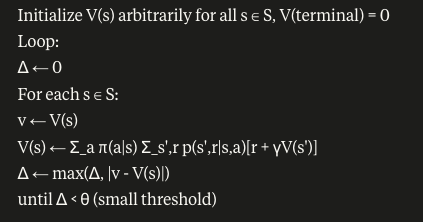

**Practical Note**: Must stop when changes are "small enough" since exact convergence requires infinite iterations.

### Example 4.1: 4×4 Gridworld

![4x4 Gridworld](../img/fig4_1.png)

**Setup**:
- States: 14 non-terminal positions + 2 terminal states
- Actions: {up, down, left, right}
- Dynamics: Deterministic movement, stay in place if hit wall
- Reward: -1 on all transitions until terminal state
- Policy: Random (all actions equally likely)

**Results show**: How negative values propagate from edges inward, with states further from terminals having more negative values (more steps to termination).

---

## 4.2 Policy Improvement

**The Problem**: Given a policy π and its value function $v_\pi$, find a better policy.

### The Policy Improvement Theorem

**Key Question**: For state $s$, should we deviate from $\pi(s)$ and take action $a$ instead?

**Action-Value Under Current Policy** (_Equation 4.6_):
$$q_\pi(s, a) = \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Interpretation**: Expected return if we take action $a$ in state $s$, then follow $\pi$ thereafter.

### 🏆 Policy Improvement Theorem

**If** $q_\pi(s, \pi'(s)) \geq v_\pi(s)$ for all $s \in S$

**Then** $v_{\pi'}(s) \geq v_\pi(s)$ for all $s \in S$

**Moreover**: If strict inequality holds for any state, then $\pi'$ is strictly better than $\pi$.

**Proof Intuition**: 
- Start with the inequality at one step
- Expand recursively using Bellman equations
- Inequalities propagate through all future time steps
- Result: Total expected return under $\pi'$ ≥ total under $\pi$

### Greedy Policy Improvement

**🏆 Greedy Policy Construction** (_Equation 4.9_):
$$\pi'(s) = \arg\max_a q_\pi(s, a) = \arg\max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

**Key Properties**:
- Takes the action that looks best according to current value estimates
- One-step lookahead using $v_\pi$
- Guaranteed to be at least as good as $\pi$ (usually better)
- If no improvement possible, then $\pi$ is already optimal

**When Greedy Equals Optimal**: If the greedy policy equals the original policy, then:
$$v_\pi(s) = \max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_\pi(s')]$$

This is the Bellman optimality equation! So $v_\pi = v_*$ and $\pi$ is optimal.

---

## 4.3 Policy Iteration

**Core Idea**: Alternate between policy evaluation and policy improvement until convergence.

### The Policy Iteration Algorithm

**Sequence**:
$$\pi_0 \xrightarrow{E} v_{\pi_0} \xrightarrow{I} \pi_1 \xrightarrow{E} v_{\pi_1} \xrightarrow{I} \pi_2 \xrightarrow{E} \cdots \xrightarrow{I} \pi_* \xrightarrow{E} v_*$$

Where:
- $E$: Policy Evaluation
- $I$: Policy Improvement (greedy)

**Convergence Guarantee**: Finite MDPs have finite number of deterministic policies, so must converge to optimal in finite iterations.

**Complete Algorithm**:

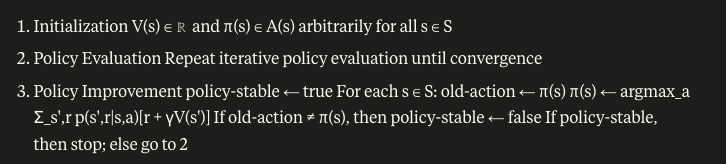

**Efficiency Note**: Each evaluation starts with value function from previous policy, dramatically speeding convergence.

### Example 4.2: Jack's Car Rental

![Jack's Car Rental](../img/fig4_2.png)

**Complex Problem Features**:
- 2D state space (cars at each location)
- Stochastic requests and returns (Poisson)
- Constraints (max 20 cars, max 5 moves)
- Non-linear costs

**Key Insight**: Policy iteration handles this complexity naturally, finding optimal car movement strategy in just a few iterations.

---

## 4.4 Value Iteration

**Motivation**: Policy iteration requires full policy evaluation each iteration. Can we truncate evaluation?

### The Value Iteration Update

**🏆 FOUNDATIONAL FORMULA** (_Equation 4.10_):
$$v_{k+1}(s) = \max_a \sum_{s',r} p(s', r|s, a)[r + \gamma v_k(s')]$$

**Key Insight**: This combines policy improvement and (truncated) policy evaluation in a single update!

**Relationship to Bellman Optimality Equation**:
- Value iteration simply turns the Bellman optimality equation into an update rule
- Direct pursuit of $v_*$ without explicit policy representation
- Policy extracted at the end via greedy selection

**Algorithm**:

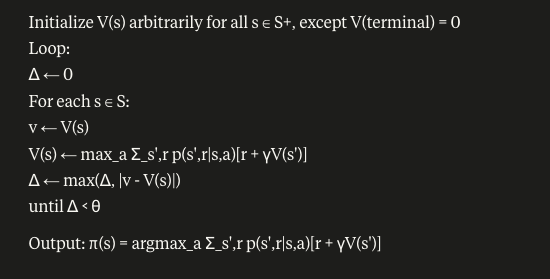

### Understanding Value Iteration

**As Truncated Policy Iteration**:
- Policy evaluation: Just one sweep
- Policy improvement: Implicit in max operation
- Repeat until convergence

**Backup Diagram Comparison**:
- Policy evaluation: Expectation over actions (weighted by π)
- Value iteration: Max over actions
- Both: Expectation over next states

### Example 4.3: Gambler's Problem

![Gambler's Problem](../img/fig4_3.png)

**Problem**: Betting on coin flips to reach $100 before going broke

**State space**: Capital ∈ {1, 2, ..., 99}  
**Actions**: Stake ∈ {0, 1, ..., min(s, 100-s)}  
**Dynamics**: Win with probability $p_h$, lose with probability $1-p_h$

**Interesting Features**:
- Optimal policy has surprising structure (e.g., bet everything at 50)
- Multiple optimal policies exist
- Shows how value iteration reveals non-intuitive strategies

---

## 4.5 Asynchronous Dynamic Programming

**Motivation**: Standard DP requires sweeps through entire state space - prohibitive for large problems (e.g., backgammon has 10²⁰ states).

### Key Ideas

**Asynchronous Updates**:
- Update states in any order
- Use whatever values are available
- Don't wait for complete sweeps
- Must continue updating all states (can't abandon any permanently)

**Flexibility Benefits**:
- Focus on important states
- Interleave with agent experience
- Parallelize computation
- Skip irrelevant states

**Convergence**: Still guaranteed if all states updated infinitely often (even randomly).

### Practical Advantages

**Efficient Value Propagation**:
- Update states along likely trajectories
- Prioritize states needing large updates
- Focus on states agent actually visits

**Real-time Interaction**:
- Agent acts while learning
- Updates applied to visited states
- Latest values guide decisions
- Natural exploration of relevant state space

---

## 4.6 Generalized Policy Iteration (GPI)

**🏆 FUNDAMENTAL CONCEPT**: The heart of all reinforcement learning!

![GPI Diagram](../img/gpi_diagram.png)

### The GPI Framework

**Two Processes**:
1. **Policy Evaluation**: Make value function consistent with policy
   - Drive $v$ toward $v_\pi$
   
2. **Policy Improvement**: Make policy greedy w.r.t. value function  
   - Drive $\pi$ toward greedy($v$)

**Key Insight**: These processes:
- **Compete**: Each makes the other "wrong"
- **Cooperate**: Together find optimal solution
- **Stabilize**: Only when both conditions satisfied simultaneously

### GPI Variations

**Granularity Spectrum**:
- **Policy Iteration**: Complete evaluation before improvement
- **Value Iteration**: One evaluation step per improvement
- **Asynchronous DP**: Arbitrary interleaving
- **Monte Carlo**: Episode-based evaluation
- **TD Learning**: Single-step evaluation

**The GPI Principle**: Almost all RL methods follow this pattern - maintain approximate policy and value function, improve each with respect to the other.

### Geometric Interpretation

![GPI Geometric View](../img/fig4_7.png)

**Two Constraints**:
- $v = v_\pi$ (evaluation line)
- $\pi = \text{greedy}(v)$ (improvement line)

**Convergence**: Only intersection satisfies both → optimal solution.

---

## 4.7 Efficiency of Dynamic Programming

### Computational Complexity

**Worst-case bounds**:
- Time: Polynomial in $|S|$ and $|A|$
- Better than exhaustive search through $|A|^{|S|}$ policies
- Linear programming alternative often worse in practice

**Curse of Dimensionality**:
- State space often exponential in problem features
- But this is problem's fault, not DP's
- DP relatively efficient for exact solutions

### Practical Considerations

**When DP Works Well**:
- Millions of states feasible with modern computers
- Good initial values speed convergence
- Asynchronous methods focus computation efficiently

**Comparison to Alternatives**:
- Direct policy search: Exponentially slower
- Linear programming: ~100× fewer states before intractable
- DP best for exact solutions when model available

---

## 4.8 Summary

### Key Concepts

**Policy Evaluation**: Compute $v_\pi$ by iteratively applying Bellman expectation equation

**Policy Improvement**: Construct better policy by acting greedily w.r.t. current value function

**Policy Iteration**: Alternate complete evaluation and improvement until optimal

**Value Iteration**: Combine truncated evaluation and improvement in single update

**Asynchronous DP**: Update states in flexible order without sweeps

**Generalized Policy Iteration (GPI)**: Framework unifying all RL methods

### Fundamental Insights

1. **Bootstrapping**: DP updates estimates based on other estimates
   - Contrast with Monte Carlo (uses actual returns)
   - Enables learning before episode ends
   
2. **Model Requirement**: DP needs complete knowledge of $p(s',r|s,a)$
   - Enables planning via computation
   - Limits applicability to known environments
   
3. **Optimal Substructure**: Optimal value functions satisfy Bellman optimality equations
   - Transform optimization into iterative computation
   - Guarantee convergence to unique optimal solution

### Connections to Broader RL

**What's Next**:
- **Chapter 5**: Monte Carlo methods - no model required, no bootstrapping
- **Chapter 6**: TD methods - no model required, but with bootstrapping
- **Later**: Function approximation for large state spaces

**The DP Legacy**: All methods approximate DP's behavior while relaxing its requirements.

---


## Exercises

### Exercise 4.1
**Q**: In Example 4.1, if π is equiprobable random policy, what is $q_\pi(11, \text{down})$? What is $q_\pi(7, \text{down})$?

```python
# Solution for Exercise 4.1
# For the 4x4 gridworld with equiprobable random policy

# q_π(11, down):
# From state 11, going down leads to terminal state
# Immediate reward: -1
# Future value: 0 (terminal)
q_pi_11_down = -1 + 0  # = -1

# q_π(7, down):
# From state 7, going down hits wall, stays at 7
# Immediate reward: -1
# Future value: v_π(7) which we can see from Figure 4.1 is -14
q_pi_7_down = -1 + (-14)  # = -15

print(f"q_π(11, down) = {q_pi_11_down}")
print(f"q_π(7, down) = {q_pi_7_down}")
```

### Exercise 4.2
**Q**: In Example 4.1, suppose state 15 added below state 13. Under original dynamics, what is $v_\pi(15)$? If state 13's down action now goes to 15?

```python

# Case 1: State 15 added, original dynamics unchanged
# State 15 has 4 actions:
# - left → 12 (v = -22)
# - up → 13 (v = -20)  
# - right → 14 (v = -14)
# - down → 15 (v = unknown, call it x)

# Bellman equation for state 15:
# x = 0.25 * [-1 + (-22)] + 0.25 * [-1 + (-20)] + 
#     0.25 * [-1 + (-14)] + 0.25 * [-1 + x]
# x = 0.25 * (-23 - 21 - 15 - 1 + x)
# x = 0.25 * (-60 + x)
# x = -15 + 0.25x
# 0.75x = -15
# x = -20

v_pi_15_case1 = -20

# Case 2: State 13's down action goes to 15
# This creates different dynamics - state 15 is now easier to reach
# States leading to 15: 12(right), 13(down), 14(left), 15(down)
# Need to solve coupled equations, but intuitively v_π(15) will be 
# slightly less negative due to easier access from state 13

print(f"v_π(15) with original dynamics = {v_pi_15_case1}")
print("v_π(15) with modified dynamics would need full policy evaluation")
```

Exercise 4.4
Q: Fix policy iteration bug for equally good policies.

```python
# Modified policy iteration to handle ties properly

def policy_iteration_fixed():
    """
    Fixed version that handles multiple equally good policies
    by detecting when no strict improvement is possible
    """
    # In policy improvement step:
    policy_stable = True
    for s in states:
        old_action = pi[s]
        
        # Find ALL optimal actions
        action_values = {}
        for a in actions[s]:
            action_values[a] = sum(
                p * (r + gamma * V[s_prime])
                for (s_prime, r, p) in dynamics(s, a)
            )
        
        max_value = max(action_values.values())
        optimal_actions = [a for a, v in action_values.items() 
                          if v == max_value]
        
        # Check if old action is among optimal actions
        if old_action not in optimal_actions:
            policy_stable = False
            pi[s] = optimal_actions[0]  # Pick any optimal action
    
    return policy_stable
```

### Exercise 4.7 (Programming)
Q: Implement policy iteration for Jack's car rental with free shuttle and parking costs.

```python
import numpy as np
from scipy.stats import poisson

def jacks_car_rental_modified():
    """
    Jack's car rental with:
    - One free car movement from location 1 to 2
    - $4 cost for >10 cars at a location
    """
    max_cars = 20
    max_move = 5
    rental_reward = 10
    move_cost = 2
    parking_cost = 4
    parking_threshold = 10
    gamma = 0.9
    
    # Poisson parameters
    lambda_requests = [3, 4]  # Expected requests at each location
    lambda_returns = [3, 2]   # Expected returns at each location
    
    # State space: (cars_at_1, cars_at_2)
    states = [(i, j) for i in range(max_cars + 1) 
              for j in range(max_cars + 1)]
    
    # Initialize policy and values
    policy = np.zeros((max_cars + 1, max_cars + 1), dtype=int)
    V = np.zeros((max_cars + 1, max_cars + 1))
    
    def expected_return(state, action):
        """Calculate expected return for state-action pair"""
        cars_1, cars_2 = state
        
        # Apply action (movement)
        move_cost_total = 0
        if action > 0:  # Moving from 1 to 2
            # First car is free
            move_cost_total = (action - 1) * move_cost
        else:  # Moving from 2 to 1
            move_cost_total = abs(action) * move_cost
            
        cars_1 -= action
        cars_2 += action
        
        # Calculate expected return including:
        # - Rental rewards
        # - Movement costs  
        # - Parking costs
        # - Future value
        
        # ... (implementation details)
        
        return expected_value
    
    # Policy iteration main loop
    # ... (similar to standard policy iteration)
    
    return policy, V
```

### Exercise 4.9 (Programming)
Q: Implement value iteration for gambler's problem with $p_h = 0.25$ and $p_h = 0.55$.

```python
import numpy as np
import matplotlib.pyplot as plt

def gamblers_problem(p_h, theta=1e-8):
    """
    Value iteration for gambler's problem
    p_h: probability of heads
    """
    # States: capital from 1 to 99 (0 and 100 are terminal)
    V = np.zeros(101)
    V[100] = 1  # Win state has value 1
    
    def value_iteration():
        while True:
            delta = 0
            for s in range(1, 100):
                v = V[s]
                
                # Calculate value for all possible actions
                action_values = []
                for a in range(0, min(s, 100 - s) + 1):
                    # Expected value of this action
                    ev = p_h * V[s + a] + (1 - p_h) * V[s - a]
                    action_values.append(ev)
                
                V[s] = max(action_values)
                delta = max(delta, abs(v - V[s]))
            
            if delta < theta:
                break
        
        # Extract optimal policy
        policy = np.zeros(100)
        for s in range(1, 100):
            action_values = []
            actions = []
            for a in range(0, min(s, 100 - s) + 1):
                ev = p_h * V[s + a] + (1 - p_h) * V[s - a]
                action_values.append(ev)
                actions.append(a)
            
            policy[s] = actions[np.argmax(action_values)]
        
        return V[1:100], policy[1:100]
    
    return value_iteration()

# Run for both probability values
V_025, policy_025 = gamblers_problem(0.25)
V_055, policy_055 = gamblers_problem(0.55)

# Plotting code
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# ... (plot values and policies)
```

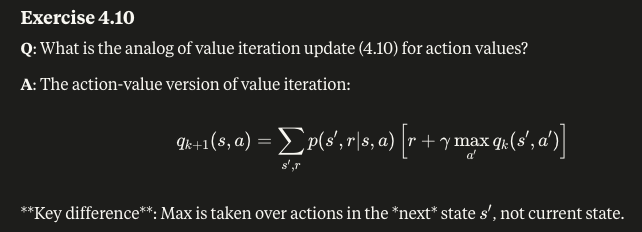

---
---

# Chapter 5: Monte Carlo Methods
---

**Chapter Overview**: This chapter introduces Monte Carlo (MC) methods, which learn directly from episodes of experience without requiring a model of the environment's dynamics. Unlike DP, MC methods don't bootstrap (they don't update estimates based on other estimates), instead waiting until an episode ends to update values based on actual returns. This makes them particularly useful when we don't have a perfect model of the environment.

**Key Advantages of MC over DP**:
1. Can learn from actual experience (model-free)
2. Can learn from simulated experience  
3. Simple and easy to understand
4. Less harmed by violations of Markov property
5. Can focus on specific states of interest

**Connection to MCTS**: Monte Carlo Tree Search (MCTS), used in AlphaGo, builds on these MC principles by using simulated rollouts to estimate action values in game trees.

---

## 5.1 Monte Carlo Prediction

**Core Idea**: Estimate the value of a state by averaging the actual returns observed after visits to that state.

### Visit Types

**First-visit MC**: Estimates $v_\pi(s)$ as the average of returns following *first* visits to $s$ in each episode.

**Every-visit MC**: Estimates $v_\pi(s)$ as the average of returns following *all* visits to $s$.

**Mathematical Foundation**: Both converge to $v_\pi(s)$ as number of visits → ∞
- First-visit: Each return is i.i.d. with finite variance → law of large numbers
- Standard error falls as $1/\sqrt{n}$ where $n$ = number of returns

### First-visit MC Algorithm

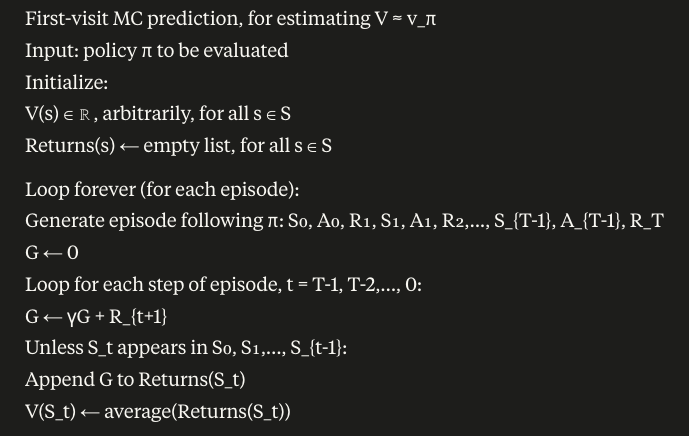

**Intuition**: We're computing returns by working backwards through the episode, accumulating discounted rewards. Only the first occurrence of each state gets its return recorded.

### Example 5.1: Blackjack

**Setup**:
- Goal: Get cards summing close to 21 without going over
- States: (player sum, dealer showing, usable ace)
- Actions: hit or stick
- Rewards: +1 win, -1 loss, 0 draw
- Policy example: Stick on 20 or 21, otherwise hit

![Blackjack Value Function](../img/fig5_1.png)

**Key Insight**: MC can easily handle this problem even though computing transition probabilities for DP would be complex.

### Backup Diagrams for MC

![MC Backup Diagram](../img/fig5_2.png)

**MC vs DP Backup Diagrams**:
- **DP**: Shows all possible transitions (breadth)
- **MC**: Shows one sampled episode trajectory (depth)
- **MC doesn't bootstrap**: Each state's estimate is independent

**Important Property**: MC can estimate individual state values without computing values for all states - useful for focusing on states of interest.

### Example 5.2: Soap Bubble 

**Problem**: Find shape of soap film on wire frame
- Shape property: Height at each point = average of neighboring heights
- MC solution: Random walk from point until hitting boundary, average boundary heights

**Connection**: This is actually solving a Dirichlet boundary value problem - shows MC methods apply beyond RL!

---

## 5.2 Monte Carlo Estimation of Action Values

**Key Challenge**: Without a model, we need $q_\pi(s,a)$ not just $v_\pi(s)$ to improve policy.

**Problem of Maintaining Exploration**: 
- If π is deterministic, many state-action pairs never visited
- No returns to average → no improvement for those actions

**Solution - Exploring Starts**: 
- Randomly select starting state-action pair
- Ensures all pairs visited infinitely often (in limit)
- Not always realistic in practice

---

## 5.3 Monte Carlo Control

**Approach**: Use Generalized Policy Iteration (GPI) with MC evaluation

![GPI Diagram](../img/fig5_3.png)

### Monte Carlo ES (Exploring Starts)

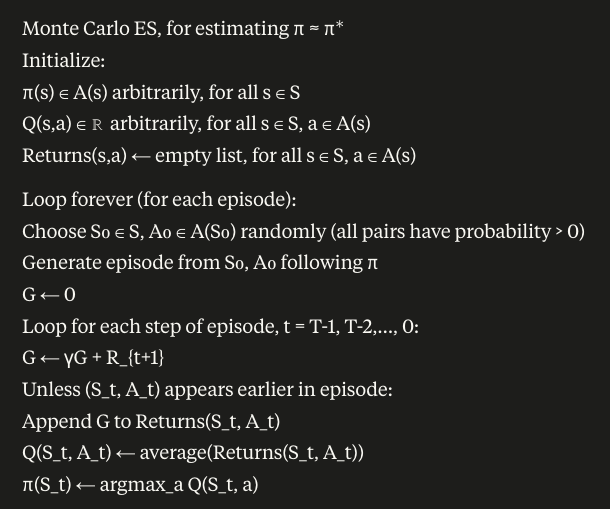

**Key Properties**:
- Alternates between evaluation and improvement
- Policy becomes greedy w.r.t. current Q
- Converges to optimal (though not formally proved)

### Example 5.3: Solving Blackjack

![Optimal Blackjack Policy](../img/fig5_2.png)

**Result**: Optimal policy found matches "basic strategy" with one exception

---

## 5.4 Monte Carlo Control without Exploring Starts

**Problem**: Exploring starts often unrealistic

**Solution**: Use **ε-soft policies**
- $\pi(a|s) \geq \frac{\varepsilon}{|A(s)|}$ for all $s,a$
- Ensures continued exploration

### ε-greedy Policies

**Definition**:
- Probability $\frac{\varepsilon}{|A(s)|}$ for non-greedy actions
- Probability $1 - \varepsilon + \frac{\varepsilon}{|A(s)|}$ for greedy action

### On-policy First-visit MC Control

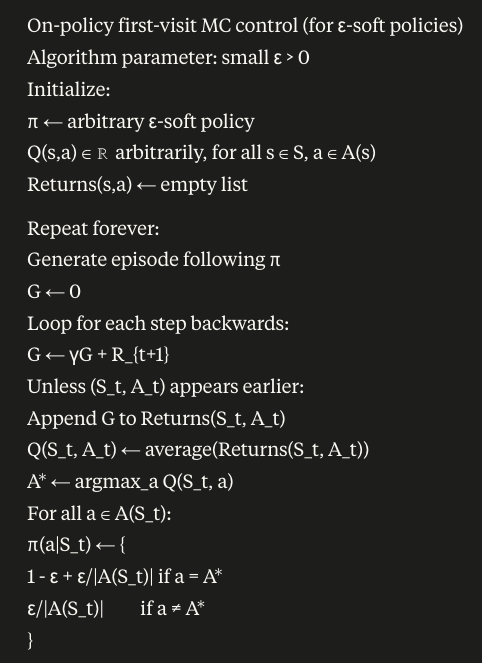

**Policy Improvement Theorem Still Applies**: Any ε-greedy policy w.r.t. $q_\pi$ is guaranteed to be better than or equal to π.

---

## 5.5 Off-policy Prediction via Importance Sampling

**Off-policy Learning**: Learn about target policy π while following behavior policy b

**Requirements**:
- **Coverage**: $\pi(a|s) > 0 \implies b(a|s) > 0$
- b must be stochastic where it differs from π

### Importance Sampling Ratio

**🏆 FOUNDATIONAL FORMULA** (_Equation 5.3_):
$$\rho_{t:T-1} = \prod_{k=t}^{T-1} \frac{\pi(A_k|S_k)}{b(A_k|S_k)}$$

**Components**:
- $\pi(A_k|S_k)$: Probability under target policy
- $b(A_k|S_k)$: Probability under behavior policy
- Product over all steps from $t$ to episode end

**Key Insight**: State transition probabilities cancel out - ratio depends only on policies!

### Ordinary Importance Sampling

**Formula** (_Equation 5.5_):
$$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}G_t}{|\mathcal{T}(s)|}$$

**Properties**:
- Unbiased but possibly infinite variance
- Can produce extreme estimates

### Weighted Importance Sampling

**🏆 FOUNDATIONAL FORMULA** (_Equation 5.6_):
$$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}G_t}{\sum_{t \in \mathcal{T}(s)} \rho_{t:T(t)-1}}$$

**Properties**:
- Biased (but bias → 0 asymptotically)
- Always finite variance (preferred in practice)
- Largest weight on any return is 1

### Example 5.4: Off-policy Blackjack Estimation

![Off-policy Estimation Comparison](../img/fig5_3.png)

**Result**: Weighted importance sampling has much lower initial error

### Example 5.5: Infinite Variance

**Setup**: Single state, two actions (left/right)
- Target policy: Always left
- Behavior policy: 50/50 left/right
- Left loops back with p=0.9, terminates with reward +1 with p=0.1

![Infinite Variance Example](../img/fig5_4.png)

**Key Point**: Ordinary importance sampling can have infinite variance when trajectories have loops!

---

## 5.6 Incremental Implementation

### Incremental Update for Weighted Importance Sampling

**Update Rule** (_Equation 5.8_):
$$V_{n+1} = V_n + \frac{W_n}{C_n}[G_n - V_n]$$

where:
- $C_{n+1} = C_n + W_{n+1}$ (cumulative sum of weights)
- $W_n = \rho_{t:T(t)-1}$ (importance sampling ratio)

### Off-policy MC Prediction Algorithm

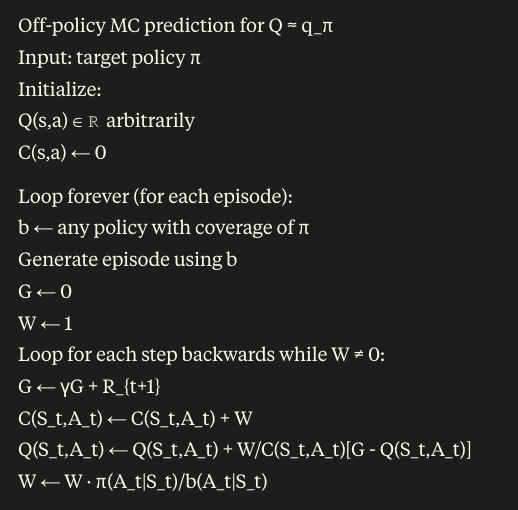

---

## 5.7 Off-policy Monte Carlo Control

### Algorithm Structure

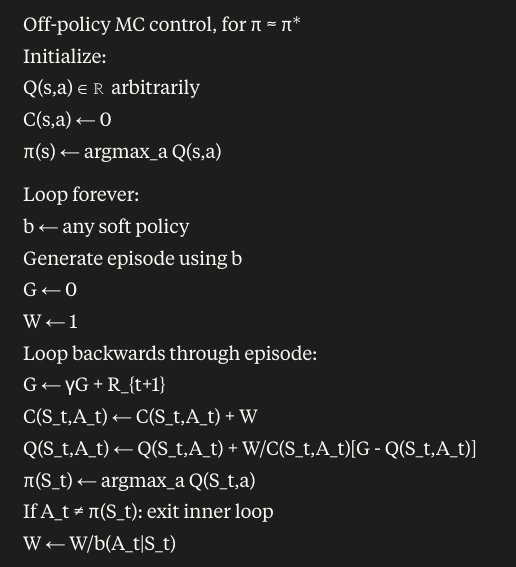

**Key Limitation**: Only learns from tail of episodes where all actions are greedy

---

## 5.8 *Discounting-aware Importance Sampling

**Problem**: When γ < 1, importance sampling ratios include irrelevant factors

**Example**: If γ = 0, return is just $R_1$, but ordinary IS uses product of 100 ratios!

**Solution**: Think of discounting as probability of termination

**Flat Partial Returns**:
$$\bar{G}_{t:h} = R_{t+1} + R_{t+2} + ... + R_h$$

**Discounting-aware Estimators** (_Equations 5.9-5.10_):
- Break return into weighted sum of flat partial returns
- Use truncated importance sampling ratios
- Reduces variance when γ < 1

---

## 5.9 *Per-decision Importance Sampling

**Key Insight**: For return component $\gamma^{k-t-1}R_{t+k}$, only need IS ratio up to time $t+k-1$

**Alternative Return**:
$$\tilde{G}_t = \rho_{t:t}R_{t+1} + \gamma\rho_{t:t+1}R_{t+2} + \gamma^2\rho_{t:t+2}R_{t+3} + ...$$

**Per-decision Estimator** (_Equation 5.15_):
$$V(s) = \frac{\sum_{t \in \mathcal{T}(s)} \tilde{G}_t}{|\mathcal{T}(s)|}$$

**Note**: No consistent per-decision version of weighted importance sampling exists yet.

---

## Summary

**Monte Carlo methods**:
- Learn from complete episodes
- Don't require environment model
- Don't bootstrap (estimates are independent)
- Can focus on states of interest

**Key algorithms**:
- MC prediction (first-visit/every-visit)
- MC ES (with exploring starts)
- On-policy MC control (ε-soft)
- Off-policy MC (importance sampling)

**Tradeoffs**:
- **On-policy**: Simpler but limited to exploring policies
- **Off-policy**: Can learn optimal deterministic policy but higher variance

**Open problems**:
- Formal convergence proof for MC ES
- Consistent per-decision weighted importance sampling

---

## Exercises

### Exercise 5.1
**Q**: Why does estimated value jump for last two rows in rear? Why drop for last row on left? Why are frontmost values higher in upper diagrams?

**A**: 
- **Jump in last two rows (rear)**: Player sums 20-21 have high value because policy sticks (avoiding bust)
- **Drop in last row (left)**: When dealer shows ace, player's chances decrease significantly
- **Higher frontmost values (upper)**: With usable ace, player can take more risks without busting, leading to higher expected returns

### Exercise 5.2
**Q**: Would every-visit MC results differ much from first-visit on blackjack?

**A**: Not significantly. In blackjack, states rarely repeat within episodes (each deal changes the state), so first-visit ≈ every-visit. Any differences would be minimal and both would converge to same values.

### Exercise 5.3
**Q**: What is the backup diagram for MC estimation of $q_\pi$?

**A**: Similar to state-value backup, but:
- Root node is a state-action pair (s,a) 
- Shows full trajectory starting from taking action a in state s
- Includes all rewards until episode termination
- No bootstrapping from other action values

### Exercise 5.4
**Q**: Make incremental version of MC ES algorithm.

**A**:
```python
# Replace the averaging step with:
N(S_t, A_t) ← N(S_t, A_t) + 1  # count visits
Q(S_t, A_t) ← Q(S_t, A_t) + 1/N(S_t, A_t) * [G - Q(S_t, A_t)]
```

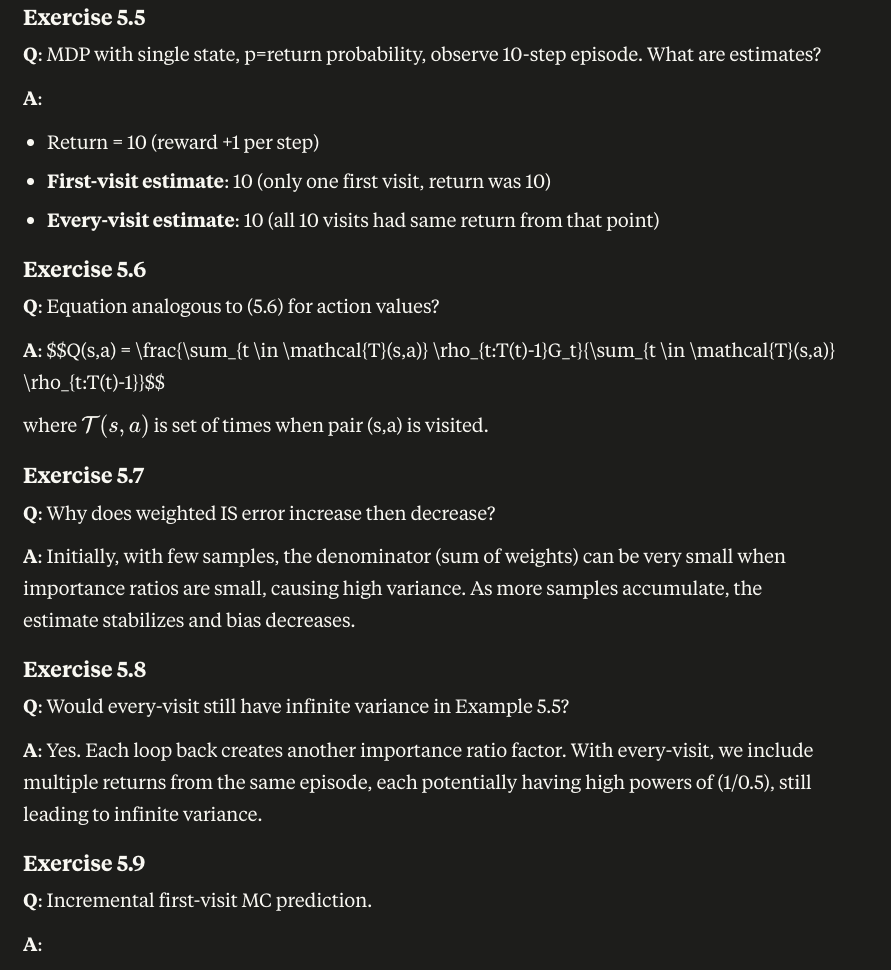

# After calculating G for state S_t:

```python
if S_t not in visited_states:
    N(S_t) ← N(S_t) + 1
    V(S_t) ← V(S_t) + 1/N(S_t) * [G - V(S_t)]
    visited_states.add(S_t)
```

### Exercise 5.10
Q: Derive weighted-average update rule (5.8) from (5.7).
A: Starting from:

$V_n=\frac{\sum_{k=1}^{n-1} W_k G_k}{\sum_{k=1}^{n-1} W_k}=\frac{\sum_{k=1}^{n-1} W_k G_k}{C_{n-1}}$

For $V_{n+1}$:

$V_{n+1}=\frac{\sum_{k=1}^n W_k G_k}{C_n}=\frac{C_{n-1} V_n+W_n G_n}{C_{n-1}+W_n}$

Rearranging:

$V_{n+1}=V_n+\frac{W_n}{C_n}\left(G_n-V_n\right)$

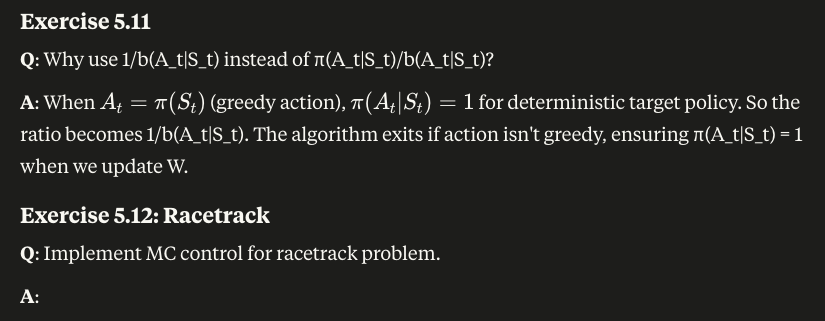

```python
def racetrack_mc_control(episodes=10000):
    # Initialize Q(s,a) and C(s,a) for all states and actions
    Q = defaultdict(lambda: np.zeros(9))  # 9 actions
    C = defaultdict(lambda: np.zeros(9))
    
    for episode in range(episodes):
        # Generate episode with exploring starts
        trajectory = generate_episode()
        G = 0
        
        # Work backwards through episode
        for t in range(len(trajectory)-1, -1, -1):
            s, a, r = trajectory[t]
            G = gamma * G + r
            
            # First-visit check
            if (s, a) not in [(x[0], x[1]) for x in trajectory[:t]]:
                C[s][a] += 1
                Q[s][a] += (G - Q[s][a]) / C[s][a]
    
    # Extract optimal policy
    policy = {}
    for s in Q:
        policy[s] = np.argmax(Q[s])
    
    return policy, Q
```

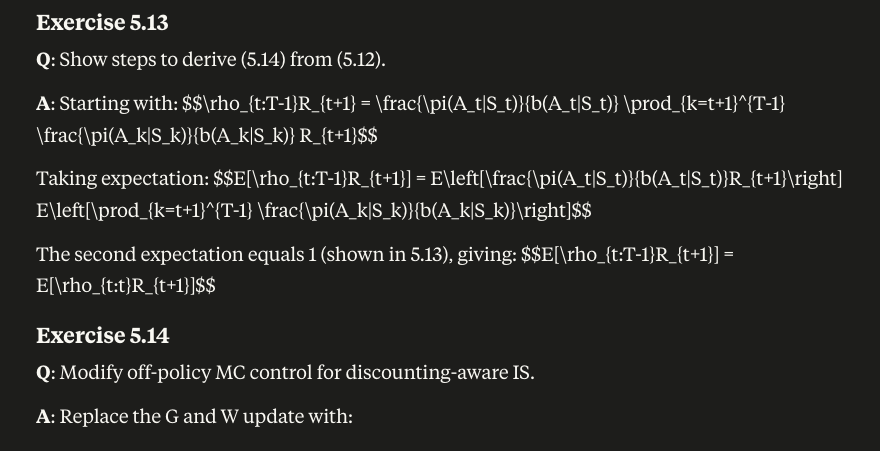

```python
# Compute flat partial returns and weights
for h in range(t+1, T):
    G_bar = sum(R[t+1:h+1])  # Flat partial return
    W_h = importance_ratio(t, h-1)
    
    # Accumulate discounting-aware update
    update += (1-gamma) * gamma**(h-t-1) * W_h * G_bar

# Final term
G_bar_T = sum(R[t+1:])
W_T = importance_ratio(t, T-1)
update += gamma**(T-t-1) * W_T * G_bar_T
```

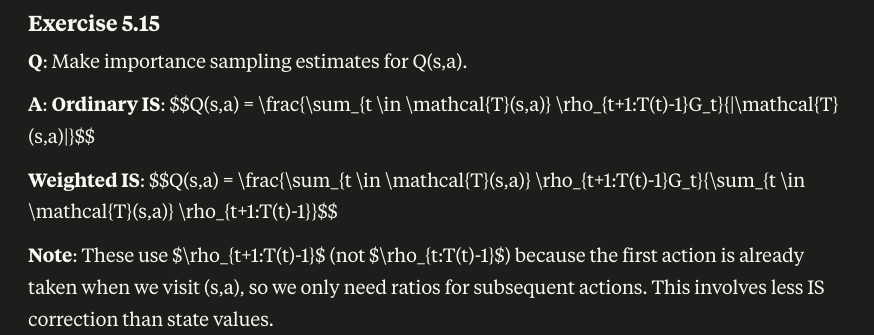

---
---

# Chapter 6: Temporal-Difference Learning
---

**Chapter Overview**: This chapter introduces temporal-difference (TD) learning, arguably the most central and novel idea in reinforcement learning. TD methods combine the sampling of Monte Carlo with the bootstrapping of dynamic programming, enabling online learning from raw experience without a model.

**Key Innovation**: TD methods can learn directly from experience without waiting for final outcomes (unlike Monte Carlo) and without needing a model of the environment (unlike DP).

**Critical Insight**: TD methods update estimates based on other estimates - they learn a guess from a guess. This bootstrapping property, combined with sampling, makes TD methods uniquely powerful for real-world RL applications.

![TD Learning Overview](../img/fig6_1.png)

---

## 6.1 TD Prediction

**Core Idea**: TD methods learn value functions directly from experience by updating estimates based on the difference between consecutive predictions.

### Monte Carlo vs TD Update Rules

**Monte Carlo update** (_Equation 6.1_):
$$V(S_t) \leftarrow V(S_t) + \alpha[G_t - V(S_t)]$$

**TD(0) update** (_Equation 6.2_):
$$V(S_t) \leftarrow V(S_t) + \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

**Key difference**:
- **Monte Carlo**: Uses actual return $G_t$ (must wait until episode ends)
- **TD(0)**: Uses estimated return $R_{t+1} + \gamma V(S_{t+1})$ (can update immediately)

### The TD Error

**🏆 FOUNDATIONAL CONCEPT - TD Error** (_Equation 6.5_):
$$\delta_t \doteq R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$$

**Components**:
- $\delta_t$: TD error at time $t$
- $R_{t+1}$: Immediate reward
- $\gamma V(S_{t+1})$: Discounted estimate of future value
- $V(S_t)$: Current estimate

**Intuition**: The TD error measures the difference between our current prediction and a better prediction we can make one step later. It's the "surprise" in the value estimate.

### Tabular TD(0) Algorithm

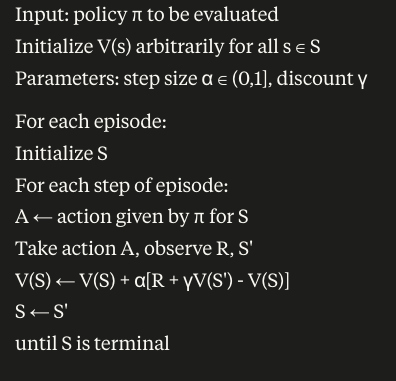

### Why TD Methods Bootstrap

**From Bellman equation** (_Equations 6.3-6.4_):
$$v_\pi(s) = \mathbb{E}_\pi[G_t | S_t = s]$$
$$= \mathbb{E}_\pi[R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s]$$

**TD target relationship**: TD methods sample the expectation and use current estimates in place of true values.

### TD Error as Sum of Future TD Errors

**Important identity** (_Equation 6.6_):
$$G_t - V(S_t) = \sum_{k=t}^{T-1} \gamma^{k-t}\delta_k$$

**Intuition**: The Monte Carlo error equals the sum of all future TD errors (discounted). This shows the deep connection between TD and MC methods.

---

## 6.2 Advantages of TD Prediction Methods

**TD advantages over Monte Carlo**:
1. **Online learning**: Can learn before episodes end
2. **Continuing tasks**: Works without episodes
3. **Lower variance**: Updates have less variability than MC

**TD advantages over DP**:
1. **Model-free**: No need for environment dynamics
2. **Samples experience**: Works with real interactions

**Convergence guarantee**: TD(0) converges to $v_\pi$ under standard stochastic approximation conditions.

### Example 6.2: Random Walk

![Random Walk Task](../img/fig6_2.png)

**Task**: 5 states in a row, start at center, move left/right randomly, +1 reward at right terminal.

**Result**: TD consistently outperforms MC in terms of RMS error, especially early in learning.

---

## 6.3 Optimality of TD(0)

**Batch updating**: Process all experience repeatedly until convergence.

**Key finding**: Under batch updating:
- **Monte Carlo**: Finds estimates minimizing mean-squared error on training data
- **TD(0)**: Finds maximum-likelihood estimate of Markov process

**Certainty-equivalence estimate**: TD(0) computes the value function that would be exactly correct if the maximum-likelihood model were exactly correct.

**Intuition**: TD methods implicitly build a model of the Markov process and compute values for that model, explaining their efficiency advantage.

---

## 6.4 Sarsa: On-Policy TD Control

**Core idea**: Learn action-values $q_\pi(s,a)$ instead of state-values, using TD methods.

**🏆 FOUNDATIONAL FORMULA - Sarsa update** (_Equation 6.7_):
$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$$

**Name origin**: Uses quintuple $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$ - hence "Sarsa"

### Sarsa Algorithm

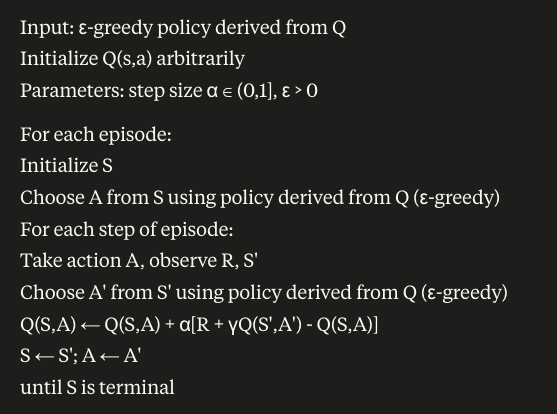

**Key property**: Sarsa is on-policy - it learns about the policy it's actually following (including exploration).

### Example 6.5: Windy Gridworld

![Windy Gridworld](../img/fig6_3.png)

**Task**: Grid navigation with upward wind in middle columns.

**Result**: Sarsa learns efficient path despite stochastic wind, demonstrating online learning advantage.

---

## 6.5 Q-learning: Off-Policy TD Control

**🏆 FOUNDATIONAL FORMULA - Q-learning update** (_Equation 6.8_):
$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha[R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t)]$$

**Key innovation**: Directly learns $q_*$ regardless of policy being followed!

### Q-learning Algorithm

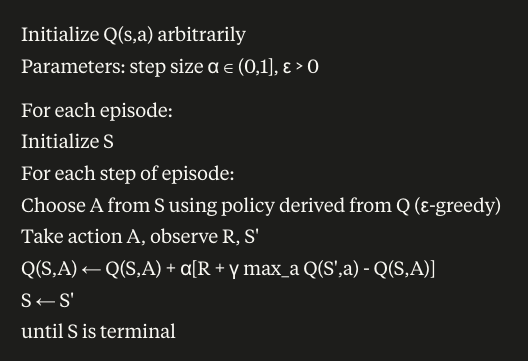

### Off-Policy Nature

**Critical distinction**:
- **Behavior policy**: How we choose actions (e.g., ε-greedy)
- **Target policy**: What we're learning about (greedy w.r.t. Q)

**Q-learning separates these**: Always learns about greedy policy while behaving exploratorily.

### Deep Q-Networks (DQN) - A Modern Extension

**Brief note**: DQN (2015) revolutionized RL by combining Q-learning with deep neural networks:
- Uses neural network to approximate Q-function
- Experience replay: stores and reuses past experiences
- Target network: separate network for stable targets
- Enabled human-level Atari game play

### Example 6.6: Cliff Walking

![Cliff Walking Comparison](../img/fig6_4.png)

**Key insight**: Q-learning learns optimal (risky) path but performs worse online due to exploration. Sarsa learns safer path that accounts for exploration.

---

## 6.6 Expected Sarsa

**Update rule** (_Equation 6.9_):
$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha\left[R_{t+1} + \gamma \sum_a \pi(a|S_{t+1})Q(S_{t+1}, a) - Q(S_t, A_t)\right]$$

**Key insight**: Expected Sarsa moves in the same direction as Sarsa in expectation, but with lower variance.

**Relationship to Q-learning**: When $\pi$ is greedy, Expected Sarsa = Q-learning.

![Backup Diagrams](../img/fig6_5.png)

**Performance**: Generally outperforms both Sarsa and Q-learning, especially with large $\alpha$.

---

## 6.7 Maximization Bias and Double Learning

**Problem**: Using maximum of estimates as estimate of maximum leads to positive bias.

**Example scenario**: Many actions with true value 0, but noisy estimates - max will be positive!

### Double Q-learning

**Key idea**: Use two Q-functions, use one to select actions and other to evaluate.

**Update rules** (_Equation 6.10_):
- With 0.5 probability: $Q_1(S_t, A_t) \leftarrow Q_1(S_t, A_t) + \alpha[R_{t+1} + \gamma Q_2(S_{t+1}, \arg\max_a Q_1(S_{t+1}, a)) - Q_1(S_t, A_t)]$
- Otherwise: Update $Q_2$ symmetrically

### Double Q-learning Algorithm

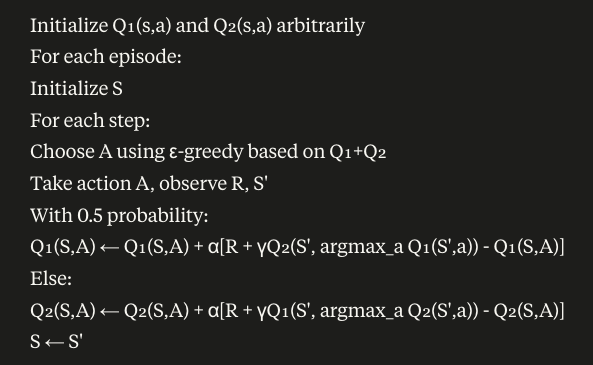

![Maximization Bias Example](../img/fig6_6.png)

---

## 6.8 Games, Afterstates, and Other Special Cases

**Afterstates**: States after agent's move but before environment's response.

**Example**: In tic-tac-toe, board position after your move but before opponent's.

**Advantage**: Many state-action pairs may lead to same afterstate - more efficient learning.

**When useful**:
- Games (know immediate effect of moves)
- Queuing problems (know effect of routing decisions)
- Any domain with known action effects but unknown subsequent dynamics

---

## 6.9 Summary

**TD methods are foundational because they**:
1. Learn online from experience
2. Don't need environment model
3. Bootstrap from other estimates
4. Work for continuing tasks

**Algorithm comparison**:
- **TD(0)**: Basic prediction algorithm
- **Sarsa**: On-policy control (learns about policy being followed)
- **Q-learning**: Off-policy control (learns optimal policy)
- **Expected Sarsa**: Lower variance, can be on- or off-policy
- **Double Q-learning**: Eliminates maximization bias

**Key insight**: TD methods enable efficient online learning by bootstrapping - updating estimates based on other estimates without waiting for final outcomes.

---

## Exercises

### Exercise 6.1
**Q**: If V changes during episode, what must be added to TD error sum to equal MC error?

**A**: Let $V_t$ denote the value function at time $t$. The additional terms are:
$$\sum_{k=t}^{T-1} \gamma^{k-t}[V_{k+1}(S_{k+1}) - V_k(S_{k+1})]$$

These terms account for the changes in value estimates during the episode.

### Exercise 6.2
**Q**: Why might TD be better than MC when moving to new building (same highway entrance)?

**A**: TD can immediately leverage the unchanged parts of the commute (highway onwards). While MC must experience many complete new trajectories, TD updates propagate the unchanged highway-to-home values backward to the new building states immediately. This is faster adaptation through bootstrapping.

### Exercise 6.3
**Q**: What does first episode of random walk tell us if only V(A) changed?

**A**: The episode went: Center → B → A → terminal-left. Only V(A) changed because TD only updates states actually visited. The update was V(A) ← 0.5 + 0.5[0 + 0 - 0.5] = 0.25, a decrease of 0.25.

### Exercise 6.4
**Q**: Would different α values change which algorithm is better?

**A**: The relative advantage of TD over MC is fairly robust across α values. Very small α would make both slow. Very large α would make both unstable, though TD might suffer more due to bootstrapping on changing estimates. The qualitative advantage of TD remains.

### Exercise 6.5
**Q**: Why does TD RMS error go up at high α?

**A**: At high α, TD updates cause large changes to value estimates. Since TD bootstraps, these volatile estimates propagate errors through the value function. The "down then up" pattern occurs because initial learning reduces error, but continued large updates prevent convergence, causing estimates to oscillate.

### Exercise 6.6
**Q**: Two ways to compute true values for random walk?

**A**: 
1. **Solve Bellman equations**: Set up system v(B) = 0.5v(A) + 0.5v(C), etc., and solve
2. **First-visit probabilities**: Calculate probability of reaching right terminal before left from each state

We probably used method 2 (simpler calculation).

### Exercise 6.7
**Q**: Off-policy TD(0) with importance sampling?

**A**: 
$$V(S_t) \leftarrow V(S_t) + \alpha \rho_{t:t} [R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

where $\rho_{t:t} = \frac{\pi(A_t|S_t)}{b(A_t|S_t)}$ is the single-step importance sampling ratio.

### Exercise 6.8
**Q**: Show action-value version of TD error sum identity?

**A**: Starting from $G_t - Q(S_t, A_t)$ and recursively expanding:
$$G_t - Q(S_t, A_t) = \sum_{k=t}^{T-1} \gamma^{k-t}\delta_k$$

where $\delta_k = R_{k+1} + \gamma Q(S_{k+1}, A_{k+1}) - Q(S_k, A_k)$

### Exercise 6.9
**Q**: Windy gridworld with King's moves (8 actions)?

**A**: With diagonal moves, the agent can reach the goal more efficiently by moving diagonally when beneficial. Typical improvement: ~15 steps → ~10-12 steps. A 9th "stay" action helps in strong wind columns where the agent might want to wait for better positioning.

### Exercise 6.10
**Q**: Stochastic wind version?

**A**: With stochastic wind (±1 from mean), Sarsa will learn even more conservative paths to avoid risk of being blown into bad positions. The optimal path likely shifts further from the wind columns, trading distance for safety.

### Exercise 6.11
**Q**: Why is Q-learning off-policy?

**A**: Q-learning learns about the greedy policy (target policy) while following an exploratory policy like ε-greedy (behavior policy). The max operation in the update always assumes greedy action selection, regardless of how actions are actually chosen.

### Exercise 6.12
**Q**: If action selection is greedy, are Sarsa and Q-learning identical?

**A**: Yes, if action selection is purely greedy (no exploration), then $A_{t+1} = \arg\max_a Q(S_{t+1}, a)$, making the updates identical. However, this would eliminate exploration, likely preventing convergence to optimal values.

### Exercise 6.13
**Q**: Double Expected Sarsa update equations?

**A**: With probability 0.5:
$$Q_1(S_t, A_t) \leftarrow Q_1(S_t, A_t) + \alpha\left[R_{t+1} + \gamma \sum_a \pi(a|S_{t+1})Q_2(S_{t+1}, a) - Q_1(S_t, A_t)\right]$$

Otherwise update $Q_2$ using $Q_1$ for the expectation.

### Exercise 6.14
**Q**: Jack's Car Rental with afterstates?

**A**: Afterstates would be the number of cars at each location after moving cars but before rentals/returns. This is more efficient because many different starting states and actions lead to the same afterstate (e.g., (12,8) move 2 → (10,10) same as (11,9) move 1 → (10,10)). This reduces the effective state-action space significantly.

---
---

# Chapter 7: n-step Bootstrapping
---

**Chapter Overview**: This chapter bridges Monte Carlo (MC) methods (Chapter 5) and one-step temporal-difference (TD) methods (Chapter 6) by introducing n-step TD methods. These generalize both approaches, allowing a smooth shift between them based on task needs. n-step methods form a spectrum: MC at one end (full episode backups) and one-step TD at the other (single-step backups). Intermediate n often performs best, balancing bias-variance trade-offs.

**Key Insight**: Neither pure MC (high variance, low bias) nor one-step TD (low variance, higher bias) is always optimal. n-step methods tune the bootstrapping amount for better performance.

**Sidenote**: Bootstrapping means updating estimates based on other estimates (like TD), reducing variance but introducing bias if estimates are poor. MC avoids bootstrapping by waiting for actual returns, but suffers from high variance in long episodes.

---

## 7.1 n-step TD Prediction

**Core Idea**: Estimate value function $v_\pi$ using n-step updates—look ahead n steps, then bootstrap from the estimated value at step n.

**Spectrum of Methods**:
- One-step TD: Update based on immediate reward + bootstrapped next state value.
- MC: Update based on all rewards until episode end (no bootstrapping).
- n-step TD: Update based on n rewards + bootstrapped value at n steps ahead.

![Backup Diagrams for n-step Methods](../img/fig7_1.png)

**n-step Return** (target for update, _Equation 7.1_):
$$G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n V_{t+n-1}(S_{t+n})$$
- For $t + n < T$; if $t + n \geq T$, $G_{t:t+n} = G_t$ (full return).
- Components:
  - $R_{t+1}$ to $R_{t+n}$: Actual rewards over n steps.
  - $\gamma^n V_{t+n-1}(S_{t+n})$: Bootstrapped estimate correcting for truncation.
- Intuition: Approximation to full return $G_t$; truncates after n steps and corrects with current value estimate.

**Update Rule** (_Equation 7.2_):
$$V_{t+n}(S_t) \doteq V_{t+n-1}(S_t) + \alpha [G_{t:t+n} - V_{t+n-1}(S_t)]$$
- For $0 \leq t < T$; values unchanged for unvisited states.
- $\alpha$: Step size.
- Intuition: Moves $V(S_t)$ toward the n-step return target.

**🏆 FOUNDATIONAL FORMULA**: The n-step return blends sampling (actual rewards) and bootstrapping, central to unifying TD and MC.

**Algorithm**: Pseudocode for n-step TD (state-value prediction under policy $\pi$).
- Initialize $V(s)$ arbitrarily.
- For each episode: Store states/rewards mod $n+1$; compute $G$ and update after n steps (or at end).

**Error Reduction Property**: n-step returns reduce error relative to true expected value more than shorter returns (proven for fixed $V$).

**Example: Random Walk** (19 states, undiscounted, rewards -1/0/+1 at ends).
- Intermediate n (e.g., 4-8) outperforms extremes for various $\alpha$.

![Performance on Random Walk](../img/fig7_2.png)

**Sidenote**: Larger tasks favor intermediate n as variance grows with episode length in MC, while one-step TD bootstraps too aggressively early on.

---

## 7.2 n-step Sarsa

**Core Idea**: Extend n-step to on-policy control for $q_\pi$ estimation.

**Backup Diagrams**:

![Backup Diagrams for n-step Action-Value Methods](../img/fig7_3.png)

**n-step Return for Action Values** (_Equation 7.4_):
$$G_{t:t+n} = R_{t+1} + \gamma R_{t+2} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n Q_{t+n-1}(S_{t+n}, A_{t+n})$$
- $t + n < T$; else $G_{t:t+n} = G_t$.

**Update Rule** (_Equation 7.5_):
$$Q_{t+n}(S_t, A_t) \doteq Q_{t+n-1}(S_t, A_t) + \alpha [G_{t:t+n} - Q_{t+n-1}(S_t, A_t)]$$

**Algorithm**: Pseudocode for n-step Sarsa.
- Similar to n-step TD but for $Q(s,a)$; actions from $\epsilon$-greedy policy.
- Speeds policy improvement by propagating rewards faster (e.g., cliff-walking example).

**n-step Expected Sarsa**: Uses expected value over actions at step n (_Equation 7.7_):
$$G_{t:t+n} = R_{t+1} + \cdots + \gamma^{n-1} R_{t+n} + \gamma^n \bar{V}_{t+n-1}(S_{t+n})$$
- $\bar{V}_t(s) = \sum_a \pi(a|s) Q_t(s,a)$.
- Often better than Sarsa due to lower variance.

**Sidenote**: Expected Sarsa generalizes Q-learning (one-step case) to multi-step.

---

## 7.3 n-step Off-policy Learning

**Core Idea**: Learn target policy $\pi$ from behavior policy $b$ data using importance sampling (IS).

**Importance Sampling Ratio** (_Equation 7.8_):
$$\rho_{t:h} = \prod_{k=t}^{h} \frac{\pi(A_k|S_k)}{b(A_k|S_k)}$$
- Corrects for action selection differences.

**Off-policy n-step TD Update** (_Equation 7.9_):
$$V_{t+n}(S_t) \doteq V_{t+n-1}(S_t) + \alpha \rho_{t+1:t+n} [G_{t:t+n} - V_{t+n-1}(S_t)]$$
- Generalizes on-policy (ratio=1).

**Off-policy n-step Sarsa** (_Equation 7.10_):
$$Q_{t+n}(S_t, A_t) \doteq Q_{t+n-1}(S_t, A_t) + \alpha \rho_{t+1:t+n} [G_{t:t+n} - Q_{t+n-1}(S_t, A_t)]$$
- Ratio starts at $t+1$ (action $A_t$ already taken).

**Algorithm**: Pseudocode for off-policy n-step Sarsa.

**Sidenote**: IS can cause high variance if $\pi$ and $b$ differ much; zero ratio ignores bad samples, high ratio amplifies good ones.

---

## 7.4 *Per-decision Methods with Control Variates

**Core Idea**: Refine off-policy with per-decision IS and control variates (CV) for lower variance.

**Recursive n-step Return** (_Equation 7.12_):
$$G_{t:h} = R_{t+1} + \gamma G_{t+1:h}$$

**Off-policy Version with CV** (_Equation 7.13_):
$$G_{t:h} = R_{t+1} + \gamma \rho_t (G_{t+1:h} - Q_t(S_{t+1}, A_{t+1})) + \gamma \bar{V}_t(S_{t+1})$$
- CV term: Doesn't change expectation but reduces variance by ignoring unlikely branches.
- Intuition: If $\rho_t=0$, target = immediate reward + bootstrapped value (ignore sample).

**For Action Values** (_Equation 7.14_):
$$G_{t:h} = R_{t+1} + \gamma (\rho_{t+1} G_{t+1:h} + (1 - \rho_{t+1}) Q_t(S_{t+1}, A_{t+1})) + \gamma (1 - \rho_{t+1}) (\bar{V}_t(S_{t+1}) - Q_t(S_{t+1}, A_{t+1}))$$
- More complex; first action not importance-sampled.

**Sidenote**: CV exploits that unlikely actions under $\pi$ shouldn't bias updates; expected update unchanged.

---

## 7.5 Off-policy Learning Without Importance Sampling: The n-step Tree Backup Algorithm

**Core Idea**: Multi-step generalization of Expected Sarsa/Q-learning; branches over all actions (no IS).

**Backup Diagram**: Tree structure—sample spine, expected branches off states.

**n-step Return** (_Equation 7.15_ for 1-step, general recursive _Equation 7.17_):
$$G_{t:t+n} = R_{t+1} + \gamma \sum_{a \neq A_{t+1}} \pi(a|S_{t+1}) Q_{t+n-1}(S_{t+1}, a) + \gamma \pi(A_{t+1}|S_{t+1}) G_{t+1:t+n}$$
- Weights by $\pi$; samples only taken action.

**Update**: Same as Expected Sarsa but with tree return.

**Algorithm**: Pseudocode for n-step Tree Backup.

**Sidenote**: Avoids IS variance; effective when policies differ, but bootstraps less if $\pi(A_t|S_t)$ small.

---

## 7.6 *A Unifying Algorithm: n-step $Q(\sigma)$

**Core Idea**: Generalizes previous methods with per-step sampling degree $\sigma_k \in [0,1]$.

**Backup Diagrams**:

![Backup Diagrams for Q(sigma)](../img/fig7_5.png)

**n-step Return** (_Equation 7.18_):
$$G_{t:h} = R_{t+1} + \gamma [\sigma_{t+1} \rho_{t+1} (G_{t+1:h} - Q_{t}(S_{t+1}, A_{t+1})) + (1 - \sigma_{t+1} \rho_{t+1}) \bar{V}_{t}(S_{t+1})] + \gamma \sigma_{t+1} \rho_{t+1} Q_{t}(S_{t+1}, A_{t+1})$$
- $\sigma=1$: Full sampling (like Sarsa with IS).
- $\sigma=0$: Expectation (like Tree Backup).
- Intuition: Blends sampling (high variance, low bias) and expectation flexibly.

**Algorithm**: Pseudocode for off-policy n-step $Q(\sigma)$.

**🏆 FOUNDATIONAL**: Unifies on/off-policy, TD/MC, Sarsa/Q-learning; adaptable via $\sigma$.

---

## 7.7 Summary

**Key Concepts**:
- n-step methods: Tune bootstrapping degree for optimal bias-variance.
- On-policy: n-step TD/Sarsa/Expected Sarsa.
- Off-policy: IS-based (simple but high variance), Tree Backup (no IS), $Q(\sigma)$ (unifying).
- Advantages: Faster propagation, better than extremes.
- Trade-offs: More computation/memory than one-step; variance issues in off-policy.

**Fundamental Takeaways**:
1. Multi-step bootstrapping accelerates learning by balancing immediacy and completeness.
2. Off-policy needs correction (IS or trees) for policy mismatch.
3. $Q(\sigma)$: Flexible framework for future algorithms.

---

## Exercises

### Exercise 7.1 Solution
**Q**: In learning curves such as those shown in Figure 7.2, asymptote is offset slightly above 0 due to the off-by-0.5-step problem (random walk starts in center state 10, true values range 1/20 to 19/20). Can you explain why? What would the asymptotic error be if $\gamma=0.9$?

**A**: 
- Asymptotic RMS error isn't zero because learned values approximate $v_\pi$, but true values are offset (e.g., from center, expected return is average of left/right paths).
- With $\gamma=0.9$, error scales by discount; asymptotic error would be $0.5 \times (1 - \gamma) = 0.05$ (general undiscounted bias persists, but discounted reduces effective offset).

### Exercise 7.2 Solution
**Q**: Why does off-policy MC control require $\pi$ is greedy wrt $Q$, while on-policy MC does not?

**A**: Off-policy separates behavior ($b$, exploratory) and target ($\pi$, greedy). Greedy $\pi$ ensures optimality; on-policy uses single improving policy, converging to optimal without explicit greediness.

### Exercise 7.3 Solution
**Q**: Why larger random walk (19 vs 5 states)? Effect of smaller walk or left reward -1 vs 0 on best n?

**A**: 
- Larger: Amplifies variance in MC (longer episodes), shifts optimum n rightward.
- Smaller: Favors larger n (closer to MC).
- -1 left: Increases variance asymmetry; may favor slightly smaller n for stability.

### Exercise 7.4 Solution
**Q**: Prove n-step Sarsa return equals novel TD error form.

**A**:
Start with $G_{t:t+n} = Q_{t-1}(S_t, A_t) + \sum_{k=t}^{t+n-1} \gamma^{k-t} [R_{k+1} + \gamma Q_k(S_{k+1}, A_{k+1}) - Q_{k-1}(S_k, A_k)]$.
- By induction: Base $n=1$ holds; assume for n-1, expand recursively.

### Exercise 7.5 Solution
**Q**: Pseudocode for off-policy state-value prediction with CV.

**A**:
```python
# Off-policy n-step TD with per-decision IS and CV for V ≈ v_π
# Input: policies π, b; α; n
# Initialize V(s) arbitrarily
# For each episode:
#   Generate episode using b: S0, R1, S1, ..., RT
#   For t = 0 to T-n:
#       G = V(St+n)  # or adjust if terminal
#       For k = t+n-1 downto t:
#           ρ = π(Ak|Sk) / b(Ak|Sk)
#           G = R_{k+1} + γ * ρ * (G - V(S_{k+1})) + γ * V(S_{k+1})
#       V(St) += α * (G - V(St))
```

### Exercise 7.6 Solution
Q: Why per-decision methods better than ordinary IS for off-policy MC?

A: Per-decision applies IS only to relevant steps, adding CV to reduce variance (ignores low-prob branches without zeroing entire return).

### Exercise 7.7 Solution
Q: Prove per-decision off-policy return expectation equals on-policy return.

A: By induction on horizon h:

Base: $E[G_{h-1:h}] = E[R_h] = v_π(S_{h-1})$.
Assume for t+1:h; then $E[G_{t:h}] = E[R_{t+1} + γ ρ_t G_{t+1:h} + γ (1 - ρ_t) V(S_{t+1})] = ... = v_π(S_t)$, since $E[ρ_t]=1$, CV expectation 0.

---
---

# Chapter 8: Planning and Learning with Tabular Methods

**Chapter Overview**: This chapter unifies model-based methods (like dynamic programming, which use planning with an environment model) and model-free methods (like Monte Carlo and TD learning, which rely directly on experience). It introduces integrated architectures like Dyna that combine learning and planning. Key themes include using models to simulate experience, the trade-offs between expected and sample updates, focusing backups efficiently, and decision-time planning techniques like MCTS. As the capstone of Part I (tabular methods), it recaps core dimensions of RL methods and bridges to Part II's focus on scaling via function approximation.

**Key Unification Insight**: All RL methods compute value functions via backups (looking ahead to future events). Planning uses simulated experience from a model; learning uses real experience. This allows seamless integration: apply learning algorithms to model-generated data for planning.

**Sidenote on Planning vs. Learning**: Planning is "deliberative" (model-based foresight), learning is "reactive" (experience-based adaptation). But they're not opposites—many methods blend them. Intuitively, planning is like mentally rehearsing scenarios; learning is trial-and-error in the real world.

---

## 8.1 Models and Planning

**Models**: Anything an agent uses to predict environment responses to actions.

- **Given**: State $s$, action $a$
- **Predicts**: Next state $s'$ and reward $r$

**Types of Models**:
- **Distribution model**: Gives all possible $s', r$ and their probabilities (e.g., DP's $p(s', r|s, a)$ from Equation 3.2).
- **Sample model**: Samples one possible $s', r$ according to probabilities (e.g., blackjack simulation in Chapter 5).

**Intuition**: Distribution models are "stronger" (can generate samples and probabilities) but harder to obtain. Sample models are easier (e.g., simulate dice rolls) but may introduce sampling variance.

**Sidenote**: Models simulate experience. From a state and policy, generate episodes (trajectories). This "simulated experience" can train RL methods just like real experience.

**Planning**: Computation to improve policy/value function using a model.
- **State-space planning**: Focus of RL (vs. plan-space planning like evolutionary methods).
- **Core Structure**: Compute values via backups on simulated experience.

**Diagram Insight**: All state-space planning fits: (1) Compute values as intermediate step; (2) Use backups on simulated experience.

![Common Structure of Planning and Learning](../img/fig8_1.png)

**Unification with Learning**: Replace real experience in learning methods (e.g., TD) with model-simulated experience for planning. Both estimate values via backups; difference is experience source.

---

## 8.2 Dyna: Integrated Planning, Acting, and Learning

**Dyna Architecture**: Online agent integrating planning, acting, model-learning, and direct RL (all in parallel).

- **Direct RL**: Improve value/policy from real experience (e.g., Q-learning).
- **Model-learning**: Update model from real experience.
- **Planning**: Indirect RL—improve value/policy from simulated experience.

**Diagram**:

![Dyna Architecture](../img/fig8_1.png)  <!-- Note: This is Figure 8.1 from the text -->

**Relationships** (see diagram on page 163):
- Experience → Model (model-learning)
- Experience → Value/Policy (direct RL)
- Model → Simulated Experience → Value/Policy (planning)

**Search Control**: Process selecting starting states/actions for simulated experiences (e.g., random from experienced pairs).

**Tabular Dyna-Q Algorithm** (pseudocode on page 164):
- Initialize $Q(s,a)$ and Model$(s,a)$
- Loop forever:
  - (a) $S$ ← current state
  - (b) $A$ ← ε-greedy$(S, Q)$
  - (c) Execute $A$, observe $R, S'$
  - (d) $Q(S,A) \leftarrow Q(S,A) + \alpha [R + \gamma \max_{a'} Q(S',a') - Q(S,A)]$  (direct RL, one-step tabular Q-learning)
  - (e) Model$(S,A) \leftarrow R, S'$  (assuming deterministic env)
  - (f) For $n$ planning steps: Random experienced $S_{rand}, A_{rand}$; Simulate $R, S'$ from Model; Update $Q$ as in (d)

**Key Parameters**:
- $n$: Planning steps per real step (balances computation).
- Assumes deterministic model; queries only experienced pairs.

**Example: Dyna Maze** (Figure 8.2):
- Task: From S to G quickly.
- Dyna-Q with more $n$ learns faster (e.g., $n=50$ builds extensive policy in one episode).

![Dyna Maze Learning Curves](../img/fig8_2.png)

![Policies During Learning](../img/fig8_3.png)

**Intuition**: Planning builds "mental models" to accelerate learning. Without planning ($n=0$), policy grows one step per episode; with planning, it expands rapidly via backups.

**Sidenote**: Dyna-Q unifies: Same Q-update for real/simulated experience. Agent is always acting, planning, learning—model improves as experience grows.

**Exercise Insight**: Multi-step methods (Ch. 7) might match Dyna if model accurate, but Dyna's one-step simplicity + many simulations often wins.

---

## 8.3 When the Model Is Wrong

**Issue**: Models can be inaccurate (initially empty or environment changes).

**Example: Blocking Maze** (Figure 8.4):
- Path blocks after 1000 steps; new path opens.
- Dyna-Q recovers but wanders initially.

**Worse Case: Shortcut Maze** (Figure 8.5):
- Shortcut opens; Dyna-Q misses it (model says impossible, ε-greedy rarely explores enough).

**Solution: Dyna-Q+**:
- Track time $τ$ since last real try of $(s,a)$.
- Add exploration bonus: Simulated reward $r + κ\sqrt{τ}$ (encourages testing stale transitions).
- Solves shortcut by exploring long-untried actions.

![Blocking Maze Performance](../img/fig8_4.png)

![Shortcut Maze Performance](../img/fig8_5.png)

**Intuition**: Wrong models cause "model traps." Add curiosity (bonus for uncertainty) to detect changes.

**Sidenote**: Stochastic envs: Average model over experiences. Changing envs: Weight recent experiences more.

---

## 8.4 Prioritized Sweeping

**Issue**: Uniform random planning (Dyna-Q) wastes updates on low-impact states.

**Solution**: Focus backups backward from high-change states (like reverse BFS).

**Prioritized Sweeping Algorithm** (for deterministic env, pseudocode on page 170):
- Use priority queue: State-action pairs prioritized by update magnitude $P = |R + \gamma \max_a Q(S',a) - Q(S,A)|$.
- If $P > θ$ (small threshold), insert/update queue.
- Update top pair; propagate changes to predecessors.

**Intuition**: Chain reactions—big changes in one state affect predecessors. Queue ensures efficient backward focus.

**Advantages**:
- Faster than uniform (e.g., maze: 3x fewer backups for same performance).
- Stochastic extension: Sample successors.

**Example: Rod Maneuvering** (Figure 8.6): Solves large (14k states) deterministic task efficiently.

![Prioritized Sweeping on Maze](../img/fig8_6.png)  <!-- Assuming this is the rod figure or maze comparison -->

**Sidenote**: Like heuristic search but retains values long-term. "Small backups" (van Seijen & Sutton, 2013) take this further: Probability-weighted single transitions without sampling.

---

## 8.5 Expected vs. Sample Updates

**Dimensions of Updates**:
- State vs. action values.
- Optimal vs. arbitrary policy.
- Expected (all successors) vs. sample (one successor).

**Trade-off**: Expected: Accurate but compute-heavy (branching factor $b$). Sample: Noisy but cheap.

**Efficiency Insight** (Figure 8.7): Sample often better for large $b$ (reduces error faster per computation).

![Expected vs Sample Efficiency](../img/fig8_7.png)

**General Rule**: Sample wins for large $b$, deep backups; expected for small $b$, shallow.

**Sidenote**: Planning favors samples (easy from model); real experience favors expected (to reduce variance).

---

## 8.6 Trajectory Sampling

**Update Distribution**: Where to focus backups?
- **Uniform**: All states equally (like DP sweeps)—wastes on irrelevant states.
- **On-policy**: Sample trajectories following current policy—focuses on likely states.

**Advantages of On-Policy** (Figure 8.8): Faster initial learning (relevant states); but uniform may win long-term.

![Uniform vs On-Policy](../img/fig8_8.png)

**Intuition**: Like importance sampling—prioritize states under current behavior.

---

## 8.7 Real-time Dynamic Programming (RTDP)

**RTDP**: Asynchronous value iteration with on-policy trajectory sampling.
- Update only visited states greedily.
- Converges to optimal (with exploring starts).

**Advantages**: Ignores irrelevant states; policy improves during computation.

**Example: Racetrack** (Exercise 5.12): RTDP updates fewer states, finds near-optimal policy faster than full sweeps.

**Intuition**: "Relevant states" are reachable under optimal policy—RTDP naturally focuses there without visiting all.

**Sidenote**: Partial policies (optimal only on relevant states) suffice; RTDP guarantees this without infinite visits everywhere.

---

## 8.8 Planning at Decision Time

**Background Planning**: Improve overall policy/value (e.g., Dyna)—unfocused.
- **Decision-time Planning**: From current state, search deeply to select one action (discard backups after).

**Intuition**: Focus computation on now; useful when fast responses aren't needed (e.g., games).

---

## 8.9 Heuristic Search

**Classical AI Method**: From current state (root), build search tree; evaluate leaves with heuristic $v$; backup maxes to root; pick best action.

**RL Twist**: Improve heuristic $v$ over time via backups—blends with learning.

![Heuristic Search as Backups](../img/fig8_9.png)

**Intuition**: Deep search = many small backups focused downstream. Better than unfocused for current decision.

---

## 8.10 Rollout Algorithms

**Method**: Monte Carlo control from current state: Simulate trajectories per action using rollout policy $\pi$; average returns for $q(s,a)$; pick $\arg\max_a$.

**No Storage**: Discard estimates after action choice.

**Improvement**: Policy iteration—rollouts improve over $\pi$ (if $\pi$ good, rollouts better).

**Intuition**: Like MC but decision-time; balances trials vs. depth (truncate + bootstrap if needed).

**Sidenote**: Parallelizable; prune poor actions. Enhances weak $\pi$ via lookahead.

---

## 8.11 Monte Carlo Tree Search (MCTS)

**Method**: Build asymmetric tree from current state via iterations:
1. **Selection**: Tree policy (e.g., UCB) to leaf.
2. **Expansion**: Add child(ren).
3. **Simulation**: Rollout policy to end; get return.
4. **Backup**: Update $Q$ along path (average returns).

Pick action with best root $Q$.

![MCTS Process](../img/fig8_10.png)

**Intuition**: Tree focuses on promising branches; rollouts explore beyond. Balances exploration/exploitation via tree policy.

**RL View**: MC control with partial $q$ table (tree); discards between moves.

**Sidenote**: AlphaGo (Ch. 16) extends with neural nets. MCTS revolutionized AI games by smart sampling.

---

## 8.12 Summary of the Chapter

**Recap**: Models enable planning (simulated backups). Dyna integrates all; prioritized/trajectory sampling focuses efficiently. Expected/sample, background/decision-time are key axes. Rollout/MCTS: Powerful decision-time methods.

**Bridge to Part II**: Part I assumed tabular (exact values per state)—limits to small problems. Part II scales via function approximation: Approximate values over large spaces, enabling real-world RL.

---

## 8.13 Summary of Part I: Dimensions

**Core Dimensions** (Figure 8.11):
- **Depth**: Shallow (one-step) to deep (full episodes).
- **Width**: Expected (all branches) to sample (one branch).
- **On/Off-Policy**: Learn current vs. optimal policy.

![Dimensions of RL Methods](../img/fig8_11.png)

**Other Dimensions**:
- Episodic/continuing, discounted/undiscounted.
- State/action/afterstate values.
- Exploration: ε-greedy, optimistic, UCB.
- Synchronous/asynchronous.
- Real/simulated experience.
- Update location/timing/memory.

**Intuition**: Vast design space—mix for task. Function approximation (Part II) adds orthogonal scaling dimension.

**Part I Takeaway**: Tabular methods build foundations; understand backups, models, integration for intuition.

---

## Exercises

### Exercise 8.1 Solution
**Q**: Why might multi-step bootstrapping match Dyna?

**A**: Multi-step uses real multi-transitions; Dyna simulates many one-steps. If model accurate, similar. But Dyna flexible (arbitrary simulations); multi-step limited by real data—Dyna often better for planning.

### Exercise 8.2 Solution
**Q**: Why does nonplanning look poor in Fig 8.3?

**A**: It's one-step. Multi-step could propagate faster, potentially matching Dyna. But Dyna's simulations allow more flexible/backward focus.

### Exercise 8.3 Solution
**Q**: Alternate Dyna-Q+: Use $\sqrt{\tau}$ in action selection, not updates.

**A**: 
- **Strength**: Direct exploration in real actions.
- **Weakness**: Less in planning (may miss long chains). Gridworld: Good for simple changes; worse for deep dependencies.

### Exercise 8.4 Solution
**Q**: Modify Dyna-Q for stochastic envs; issues in changing envs; fix.

**A**: Model averages experiences (e.g., count-based probabilities). Changing envs: Forgets slowly—use recency weighting (e.g., higher α for model updates) or detect changes/reset.

### Exercise 8.5 Solution
**Q**: Prioritized sweeping on rod maneuvering.

**A**: (Descriptive; see text example—efficient for large deterministic tasks by focusing backups.)

(Note: Some exercises are thought experiments; solutions are conceptual.)

---
---

# Appendix A: Full Notation
---

### General Notation

> Capital letters are used for random variables.

> Lower case letters are used for the values of random variables and for scalar functions.

> Quantities that are required to be real-valued vectors are written in bold and in lower case (even if random variables). 

> Matrices are bold capitals.

| Symbol | Meaning |
|--------|---------|
| **Standard Operators** |  |
| $\doteq$ | Equality relationship that is true by definition |
| $\approx$ | Approximately equal |
| $\propto$ | Proportional to |
| $\Pr\{X = x\}$ | Probability that random variable $X$ takes value $x$ |
| $X \sim p$ | $X$ drawn from distribution $p$ |
| $\mathbb{E}[X]$ | Expectation of random variable $X$ |
| $\arg\max_a f(a)$ | Value of $a$ that maximizes $f(a)$ |
| $\ln x$ | Natural logarithm of $x$ |
| $e^x$, $\exp(x)$ | The base of the natural logarithm, $e \approx 2.71828$, carried to power $x$ |
| $\mathbb{R}$ | Set of real numbers |
| $f: \mathcal{X} \to \mathcal{Y}$ | Function from elements of set $\mathcal{X}$ to elements of set $\mathcal{Y}$ |
| $\leftarrow$ | Assignment |
| $(a, b]$ | Real interval between $a$ and $b$ including $b$ but not $a$ |
| **Standard RL Algorithm Parameters** |  |
| $\epsilon$ | Probability of taking a random action in an $\epsilon$-greedy policy |
| $\alpha, \beta$ | Step-size parameters |
| $\gamma$ | Discount-rate parameter |
| $\lambda$ | Decay-rate parameter for eligibility traces |
| $\mathbf{1}_\text{predicate}$ | Indicator function (1 if predicate is true, else 0) |

---

### Multi-Armed Bandit Notation

| Symbol | Meaning |
|--------|---------|
| $k$ | Number of actions (arms) |
| $t$ | Discrete time step or play number |
| $q_*(a)$ | True value (expected reward) of action $a$ |
| $Q_t(a)$ | Estimate at time $t$ of $q_*(a)$ |
| $N_t(a)$ | Number of times action $a$ has been selected up to time $t$ |
| $H_t(a)$ | Learned preference for selecting action $a$ at time $t$ |
| $\pi_t(a)$ | Probability of selecting action $a$ at time $t$ |
| $\bar{R}_t$ | Estimate at time $t$ of the expected reward given $\pi_t$ |

---

### Markov Decision Process Notation

| Symbol | Meaning |
|--------|---------|
| **State & Action Sets** |  |
| $s, s'$ | States |
| $a$ | An action |
| $r$ | A reward |
| $\mathcal{S}$ | Set of all nonterminal states |
| $\mathcal{S}^+$ | Set of all states, incl. terminal state |
| $\mathcal{A}(s)$ | Set of all actions available in state $s$ |
| $\mathcal{R}$ | Set of all possible rewards, a finite subset of $\mathbb{R}$ |
| $\mathcal{C}$ | Subset of (e.g., $\mathcal{R} \subset \mathbb{R}$) |
| $\in$ | Is an element of (e.g. $s \in \mathcal{S}$, $r \in \mathcal{R}$) |
| $\lvert\mathcal{S}\rvert$ | Number of elements in set $\mathcal{S}$ |
| **Time & Policy** |  |
| $t$ | Discrete time step |
| $T, T(t)$ | Final time step of episode, or including $t$ |
| $A_t$ | Action at time $t$ |
| $S_t$ | State at time $t$ |
| $R_t$ | Reward at time $t$ |
| $\pi$ | Policy (decision-making rule) |
| $\pi(s)$ | Action taken in state $s$ under deterministic $\pi$ |
| $\pi(a \mid s)$ | Probability of taking action $a$ in state $s$ under stochastic $\pi$ |
| **Returns** |  |
| $G_t$ | Return following time $t$ |
| $h$ | Horizon (timestep looked up to in forward view) |
| $G_{t:t+n}, G_{t:h}$ | $n$-step return from $t+1$ to $t+n$ or $h$ (discounted/corrected) |
| $G_{t:h}$ | Flat return (undiscounted/unadjusted) from $t+1$ to $h$ |
| $G^\lambda_t$ | $\lambda$-return |
| $G^{\wedge}_t$, $G^{\wedge a}_t$ | Truncated, corrected $\lambda$-return |
| **Transition & Reward Probabilities** |  |
| $p(s', r \mid s, a)$ | Probability of transition to $s'$ with reward $r$ from $s, a$ |
| $p(s' \mid s, a)$ | Probability of transition to $s'$ from $s$ taking $a$ |
| $r(s, a)$ | Expected immediate reward from $s$ after $a$ |
| $r(s, a, s')$ | Expected reward on transition $s \to s'$ under $a$ |
| **Value Functions** |  |
| $v_\pi(s)$ | Value of $s$ under policy $\pi$ (expected return) |
| $v_*(s)$ | Value of $s$ under optimal policy |
| $q_\pi(s, a)$ | Value of taking $a$ in $s$ under $\pi$ |
| $q_*(s, a)$ | Value of taking $a$ in $s$ under optimal policy |
| **Estimators & TD Error** |  |
| $V, V_t$ | Array estimates of $v_\pi$ or $v_*$ |
| $Q, Q_t$ | Array estimates of $q_\pi$ or $q_*$ |
| $\hat{V}(s)$ | Expected approximate action value; e.g. $\hat{V}_t(s) \doteq \sum_a \pi(a|s) Q_t(s, a)$ |
| $U_t$ | Target for estimate at time $t$ |
| $\delta_t$ | Temporal-difference (TD) error at $t$ (a random variable) |
| $\delta_t^s$, $\delta_t^a$ | State- and action-specific forms of TD error |
| $n$ | In $n$-step methods, $n$ is number of steps of bootstrapping |
---

### Function Approximation, Policy Gradient, Advanced Notation

| Symbol | Meaning |
|--------|---------|
| **Weight & Parameter Notation** |  |
| $d$ | Dimensionality—number of components of $\mathbf{w}$ |
| $d'$ | Alternate dimensionality—number of components of $\theta$ |
| $\mathbf{w}, \mathbf{w}_t$ | $d$-vector of weights underlying approximate value function |
| $w_i, w_{t,i}$ | $i$-th component of learnable weight vector |
| $\hat{v}(s, \mathbf{w})$ | Approximate value of $s$ given $\mathbf{w}$ |
| $v_\mathbf{w}(s)$ | Alternate notation for $\hat{v}(s, \mathbf{w})$ |
| $\hat{q}(s, a, \mathbf{w})$ | Approximate value of $(s, a)$ given $\mathbf{w}$ |
| $\nabla \hat{v}(s, \mathbf{w})$ | Column vector of partial derivatives w.r.t. $\mathbf{w}$ |
| $\nabla \hat{q}(s, a, \mathbf{w})$ | Column vector of partial derivatives w.r.t. $\mathbf{w}$ |
| **Feature Vectors & Eligibility Traces** |  |
| $\mathbf{x}(s)$ | Feature vector visible in $s$ |
| $\mathbf{x}(s, a)$ | Feature vector visible in $s$ taking $a$ |
| $x_i(s), x_i(s, a)$ | $i$-th component of $\mathbf{x}(s)$ or $\mathbf{x}(s, a)$ |
| $\mathbf{x}_t$ | Shorthand for $\mathbf{x}(S_t)$ or $\mathbf{x}(S_t, A_t)$ |
| $\mathbf{w}^\top \mathbf{x}$ | Inner product of vectors |
| $\mathbf{v}, \mathbf{v}_t$ | Secondary $d$-vector of weights, used to learn $\mathbf{w}$ |
| $\mathbf{z}_t$ | $d$-vector of eligibility traces at $t$ |
| **Policy Gradient Notation** |  |
| $\theta, \theta_t$ | Parameter vector of target policy |
| $\pi(a \mid s, \theta)$ | Probability of taking $a$ in $s$ given $\theta$ |
| $\pi_\theta$ | Policy corresponding to parameter $\theta$ |
| $\nabla \pi(a \mid s, \theta)$ | Partial derivatives of $\pi(a \mid s, \theta)$ w.r.t. $\theta$ |
| $J(\theta)$ | Performance measure for policy $\pi_\theta$ |
| $\nabla J(\theta)$ | Partial derivatives of $J(\theta)$ w.r.t. $\theta$ |
| $h(s, a, \theta)$ | Preference for $a$ in $s$ based on $\theta$ |
| **Behavior Policy, Baselines, Importance Sampling** |  |
| $b(a \mid s)$ | Behavior policy used to select actions while learning target $\pi$ |
| $b(s)$ | Baseline function $b: \mathcal{S} \to \mathbb{R}$ for policy-gradient methods |
| $b$ | Branching factor for MDP/search tree |
| $\rho_{t:h}$ | Importance sampling ratio for $t$ through $h$ |
| $\rho_t$ | Importance sampling ratio for time $t$ alone, $\rho_t \doteq \rho_{t:t}$ |
| $r(\pi)$ | Average reward (reward rate) for policy $\pi$ |
| $\bar{R}_t$ | Estimate of $r(\pi)$ at time $t$ |
| **State Distributions & Operators** |  |
| $\mu(s)$ | On-policy distribution over states |
| $\mu$ | $\lvert\mathcal{S}\rvert$-vector of the $\mu(s)$ for $s \in \mathcal{S}$ |
| $\|v\|^2_\mu$ | $\mu$-weighted squared norm of $v$, i.e., $\|v\|^2_\mu \doteq \sum_{s \in \mathcal{S}} \mu(s)v(s)^2$ |
| $\eta(s)$ | Expected number of visits to $s$ per episode |
| $\Pi$ | Projection operator for value functions |
| $B_\pi$ | Bellman operator for value functions |

---

### Matrices, Bellman Error, & Error Metrics

| Symbol | Meaning |
|--------|---------|
| **Matrix Notation & Linear Algebra** |  |
| $\mathbf{A}$ | $d \times d$ matrix: $\mathbf{A} \doteq \mathbb{E}\left[ \mathbf{x}_t(\mathbf{x}_t - \gamma \mathbf{x}_{t+1})^\top \right]$ |
| $\mathbf{b}$ | $d$-dimensional vector: $\mathbf{b} \doteq \mathbb{E}[R_{t+1} \mathbf{x}_t]$ |
| $\mathbf{w}_{TD}$ | TD fixed point: $\mathbf{w}_{TD} \doteq \mathbf{A}^{-1}\mathbf{b}$ |
| $\mathbf{I}$ | Identity matrix |
| $\mathbf{P}$ | $\lvert\mathcal{S}\rvert \times \lvert\mathcal{S}\rvert$ matrix of state-transition probabilities under $\pi$ |
| $\mathbf{D}$ | $\lvert\mathcal{S}\rvert \times \lvert\mathcal{S}\rvert$ diagonal matrix with $\mu$ on its diagonal |
| $\mathbf{X}$ | $\lvert\mathcal{S}\rvert \times d$ matrix with the $\mathbf{x}(s)$ as its rows |
| **Bellman Error & Value Error Metrics** |  |
| $\bar{\delta}_\mathbf{w}(s)$ | Bellman error (expected TD error) for $v_\mathbf{w}$ at $s$ |
| $\bar{\delta}_\mathbf{w}$, BE | Bellman error vector (with components $\bar{\delta}_\mathbf{w}(s)$) |
| $\text{VE}(\mathbf{w})$ | Mean square value error: $\text{VE}(\mathbf{w}) \doteq \|v_\mathbf{w} - v_\pi\|^2_\mu$ |
| $\text{BE}(\mathbf{w})$ | Mean square Bellman error: $\text{BE}(\mathbf{w}) \doteq \|\bar{\delta}_\mathbf{w}\|^2_\mu$ |
| $\text{PBE}(\mathbf{w})$ | Mean square projected Bellman error: $\text{PBE}(\mathbf{w}) \doteq \|\Pi \bar{\delta}_\mathbf{w}\|^2_\mu$ |
| $\text{TDE}(\mathbf{w})$ | Mean square temporal-difference error: $\text{TDE}(\mathbf{w}) \doteq \mathbb{E}_b[\rho_t \delta_t^2]$ |
| $\text{RE}(\mathbf{w})$ | Mean square return error |